# Starbucks Capstone Challenge

## Business Understanding

### Introduction

This data set contains simulated data that mimics customer behavior on the Starbucks rewards mobile app. Once every few days, Starbucks sends out an offer to users of the mobile app. An offer can be merely an advertisement for a drink or an actual offer such as a discount or BOGO (buy one get one free). Some users might not receive any offer during certain weeks. 



## Project Overview

The project was introduced by Richard Sharp, Data Scientist at Starbucks.  This project contains simulated data to mimic users of the Starbucks app.  The data models Starbucks sending out offers: Buy One Get One/BOGO, Discounts off a purchase, and Informational offers.  The goal of the project is to create and demonstrate a framework that can be used to discover which offers are the best for each user. We will accomplish this by creating user segments.  Since this project was not conducted as a random experiment, no causality can be concluded.  

Data Source:

https://classroom.udacity.com/nanodegrees/nd025/parts/84260e1f-2926-4127-895f-cc4432b05059/modules/78dd932d-67a7-4039-9907-f8e6211e4590/lessons/d6285247-6bc0-4783-b118-6f41981b9469/concepts/59623bdf-9fdf-4b34-a5f8-c56dc75fc512


### Problem Statement

As was mentioned in the previous paragraph, this project seeks to identify which offers are effective for what people. This will be accomplished using data manipulation and feature engineering. In addition, we will seek to understand which features are more important in determining if an offer is effective, and finally, seeing if we can predict which offer types are effective.
In exploring the data, we will also seek to answer the following questions:
1)	How does the total amount spent vary by gender?<br>
2)	Is there a difference in the average spend by membership tenure?<br>
3)	How does income differ by membership tenure?<br>
4)	Which media was used for each offer?<br>
5)	Which offers had the most transactions?<br>
6)	What is the average income by age segment?<br>
7)	What does income look like for users by age and gender? <br>
8)	Which offers are most successful overall?<br>
9)	Do females or males appear more likely to respond to offers? <br>
10)	Which offers are more effective for each gender?<br>
11)	How does the total number of transactions for effective offers compare by gender?<br>
12)	What types of effective offer does each gender seem to prefer?<br>
13)	What is the average price per transaction for each offer group (1,2,3,4)?<br>
14)	What are the total transactions per group?<br>
15)	What customers should not receive offers?<br>


### Strategy For Solving The Problem

After cleaning the data, we will answer a number of these questions using descriptive data analysis.  We will also use machine learning to identify what factors influence an offer to be effective.  To ensure clarity in our analysis, we will define metrics to be used in assigning users to groups and in identifying an effective offer.  These will be discussed later in the analysis. Mapping of users to groups will be solved using data manipulation, sorting, .shift(), filtering and assignment.  

For the machine learning model, we will be using the DecisionTreeClassifier and RandomForestClassifier models to predict which offer/user combination is effective.  We will start at the consolidated level (all offers) and then evaluate if there are differences in factors by offer type. The data does not seem to be unbalanced and we will be using StandardScaler to transform the data to prevent over weighting factors.

### Why is the proposed solution a good fit for the problem?

The proposed solution is fairly straightforward.  Manipulate the data to identify user groups and use the DecisionTreeClassifier and RandomForestClassifiers to determine if effective offers can be predicted.  RandomForestClassifier was first originated in 1995 by Tin Kam Ho. (Source:   Wikipedia  https://en.wikipedia.org/wiki/Random_forest).  It generates predictions across a wide range of data.  DecisionTreeClassifiers.  There is some debate on when decision trees originated.  According to StackExchange, the first regression tree was from 1963 published at Morgan, J. N. and Sonquist, J. A. (1963). Problems in the analysis of survey data, and a proposal. Journal of the American Statistical Association, 58:415–434, (Source:  https://stats.stackexchange.com/questions/257537/who-invented-the-decision-tree)


## Data Understanding

### Data Sets

The simulated data used in this analysis is contained in three files:

* portfolio.json - containing offer ids and meta data about each offer (duration, type, etc.)
* profile.json - demographic data for each customer
* transcript.json - records for transactions, offers received, offers viewed, and offers completed

Here is the schema and explanation of each variable in the files:

**portfolio.json**
* id (string) - offer id
* offer_type (string) - type of offer ie BOGO, discount, informational
* difficulty (int) - minimum required spend to complete an offer
* reward (int) - reward given for completing an offer
* duration (int) - time for offer to be open, in days
* channels (list of strings)

**profile.json**
* age (int) - age of the customer 
* became_member_on (int) - date when customer created an app account
* gender (str) - gender of the customer (note some entries contain 'O' for other rather than M or F)
* id (str) - customer id
* income (float) - customer's income

**transcript.json**
* event (str) - record description (ie transaction, offer received, offer viewed, etc.)
* person (str) - customer id
* time (int) - time in hours since start of test. The data begins at time t=0
* value - (dict of strings) - either an offer id or transaction amount depending on the record

We start by gathering the necessary Pandas libraries,then importing and evaluating the dataframes.


## Gather

In [1]:
# import the necessary libraries
import pandas as pd
import numpy as np
import math
import json
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import classification_report



# Supress warnings
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
# read in the json files
portfolio = pd.read_json('data/portfolio.json', orient='records', lines=True)
profile = pd.read_json('data/profile.json', orient='records', lines=True)
transcript = pd.read_json('data/transcript.json', orient='records', lines=True)

In [3]:
# Change default settings to allow seeing all of the data in a table.
pd.options.display.max_columns = 100
pd.options.display.max_rows = 400
pd.set_option('display.max_colwidth', 200)

## Assess

Now that the dataframes are imported, we review the data and it's structure.  Since some code will be repeated during the analysis, we will use funtions to reduce unnecessary code.

In [4]:
# This function identifies the percentage of missing values in a dataframe

def get_missing_pct(file_name):
    
    '''
    Inputs:  Enter the dataframe name that you want to assess for missing values.
    
    Outputs:  The function will output the variable names and percentage missing.
    
    '''
    
    percent_missing_filename = file_name.isnull().sum()*100 /len(file_name)
    missing_values_filename = pd.DataFrame({'column_name': file_name.columns,
                                 'percent_missing': percent_missing_filename})
    missing_values = missing_values_filename.sort_values('percent_missing', ascending=False)
    
    return missing_values

Let's start by reviewing the portfolio dataframe.

In [5]:
# View the contents of the portfolio dataframe (note:  it is only 10 rows in length)
portfolio.head(10)

,reward,channels,difficulty,duration,offer_type,id
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"[web, email, mobile]",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"[web, email]",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7
5,3,"[web, email, mobile, social]",7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2
6,2,"[web, email, mobile, social]",10,10,discount,fafdcd668e3743c1bb461111dcafc2a4
7,0,"[email, mobile, social]",0,3,informational,5a8bc65990b245e5a138643cd4eb9837
8,5,"[web, email, mobile, social]",5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d
9,2,"[web, email, mobile]",10,7,discount,2906b810c7d4411798c6938adc9daaa5


The portfolio dataframe has 10 rows.  It contains information regarding the available reward, channels used to make the user aware of the offer, difficulty assigned to obtaining the reward, the time available to respond to the offer (duration in days), the offer, and the offer id.

In [6]:
# A more detailed look at the portfolio data
portfolio.describe()

,reward,difficulty,duration
count,10.000000,10.000000,10.000000
mean,4.200000,7.700000,6.500000
std,3.583915,5.831905,2.321398
min,0.000000,0.000000,3.000000
25%,2.000000,5.000000,5.000000
50%,4.000000,8.500000,7.000000
75%,5.000000,10.000000,7.000000
max,10.000000,20.000000,10.000000


The rewards vary between zero and ten dollars.  Difficulty ranges between zero and twenty and the duration ranges from three days to ten days for offers in the portfolio

In [7]:
# check for missing values
get_missing_pct(portfolio)

,column_name,percent_missing
reward,reward,0.0
channels,channels,0.0
difficulty,difficulty,0.0
duration,duration,0.0
offer_type,offer_type,0.0
id,id,0.0


There are no missing items in the portfolio dataframe.

In [8]:
# Look at the structure of the portfolio dataframe
portfolio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   reward      10 non-null     int64 
 1   channels    10 non-null     object
 2   difficulty  10 non-null     int64 
 3   duration    10 non-null     int64 
 4   offer_type  10 non-null     object
 5   id          10 non-null     object
dtypes: int64(3), object(3)
memory usage: 608.0+ bytes


The portfolio data structure consis of 10 rows, 6 columns.  Three of the columns are integers and three of the columns are objects.  The following issues were identified with the portfolio dataframe.

#### Issues with the portfolio dataframe

* channels have multiple items.  We should break this into separate columns.<cr>
* Separate the offer types into individual columns
* Consider changing the portfolio ID so it is between 1 and 10 to make for better visibility
* Rename id to offer_number as it can be confused with the id in the profile dataframe


Next, we evaluate the profile dataframe.

In [9]:
# View the contents of the portfolio dataframe (note:  it is only 10 rows in length)
profile.head(5)

,gender,age,id,became_member_on,income
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,None,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN


In [10]:
profile.gender.value_counts()

M    8484
F    6129
O     212
Name: gender, dtype: int64

The profile data contains simulated information regarding gender (male, female and none), age, user id, when the user started using the app and the income.  There are 8,484 male, 6,129 female and 212 other users who did not identify a gender.

In [11]:
# A more detailed look at the profile dataframe
profile[['age', 'income']].describe()

,age,income
count,17000.000000,14825.000000
mean,62.531412,65404.991568
std,26.738580,21598.299410
min,18.000000,30000.000000
25%,45.000000,49000.000000
50%,58.000000,64000.000000
75%,73.000000,80000.000000
max,118.000000,120000.000000


Looking at the descriptive statistics, the age appears to range from a low of 18 to a maximum age of 118 years.  The mean age is approximately 62.5 years and the median age is 58.  Income ranges between 30,000 and 120,000 dollars.  The average income is 65,405 dollars and the median income is 64,000 dollars.

In [12]:
profile.id.nunique()

17000

There are 17,000 unique users in the dataframe

In [13]:
# check for missing values
get_missing_pct(profile)

,column_name,percent_missing
gender,gender,12.794118
income,income,12.794118
age,age,0.000000
id,id,0.000000
became_member_on,became_member_on,0.000000


There are approximately 13% of users who did not provide their income or gender.  This may be due to the app failing to require this information or a data error.  We will choose to make these null income values equal to -1 and the gender as O = Other as the findings from this group may be interesting.  Age ranges from a minimum of 18 to a maximum of 118.  This looks like an outlier.

In [14]:
# Look at the structure of the profile dataframe
profile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            14825 non-null  object 
 1   age               17000 non-null  int64  
 2   id                17000 non-null  object 
 3   became_member_on  17000 non-null  int64  
 4   income            14825 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 664.2+ KB


Looking at the structure of the data, there appear to be some missing values for gender and income.  There are 5 columns in the profile dataframe.  Of those, gender and id are objects, age and became_member_on are integers and income is a float.

#### Issues with the profile dataframe

* Some participants appear to have an excessive age of 118.  Investigate further.<cr>
* became_member_on should be converted to datetime<cr>
* Some gender are showing as None <cr>
* We should consider simplifying id to be a number starting at 1 and renaming id to user_id for clarity<cr>
* Income has some NaNs.  Will need to consider how to treat these NaNs.
* became_member_on should be converted to datetime

In [15]:
# View the contents of the transcript dataframe (note:  it is only 10 rows in length)
transcript.head(5)

,person,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0


Looking at the transcript dataframe, the person variable contains an alphanumeric assgned to represent a specific user.  The event variable contains the type of event.  The value column appears to be a dictionary, containing a key and value.  These will be explored in additional detail later in the project.  Finally, the time column contains the elapsed time (in hours) from the time the test started.  We will likely want to rename the person column to user_id and simplify the values to simple numbers.  We will also want to simplify the offer numbers.

In [16]:
# A more detailed look at the transcript dataframe
transcript.describe()

,time
count,306534.000000
mean,366.382940
std,200.326314
min,0.000000
25%,186.000000
50%,408.000000
75%,528.000000
max,714.000000


From the descriptive statistics above, we can see that the elapsed time ranges between 0 and 714 hours.  The mean time is 366.4 hours and the median time is 408 hours.

In [17]:
# Look at the possible values for the event varible
transcript.event.value_counts()

transaction        138953
offer received      76277
offer viewed        57725
offer completed     33579
Name: event, dtype: int64

Event has four values:  offer received, ovffer viewed transaction and completed.  Transacation has the largest number of values.

In [18]:
# Look at possible values for the value field
transcript.value.sample(20)

247398                 {'offer id': '2906b810c7d4411798c6938adc9daaa5'}
212072                 {'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}
275043                                                 {'amount': 1.01}
97464                                                  {'amount': 2.83}
306061                                                 {'amount': 0.59}
192045                                                {'amount': 14.35}
103749                                                 {'amount': 1.72}
256701                 {'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}
100356                                                {'amount': 10.03}
151427                 {'offer id': '2906b810c7d4411798c6938adc9daaa5'}
81921                  {'offer id': '5a8bc65990b245e5a138643cd4eb9837'}
240441                                                 {'amount': 0.58}
98418                                                 {'amount': 23.72}
258995    {'offer_id': '2298d6c36e964ae4a3e7e9706d1fb8c2', 'rewa

The value field contains a dictionary.  The key identifies if offer id is present it also contains an amount.  The value is either an offer_id, mapping to portfolio or an actual amount value.  These need to be moved into separate columns.  Also, notice that offer id sometimes appears as offer_id.

In [19]:
transcript.person.nunique()

17000

There are 17,000 unique persons in the transcript dataframe.

In [20]:
# Look at the structure of the transcript dataframe
transcript.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306534 entries, 0 to 306533
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   person  306534 non-null  object
 1   event   306534 non-null  object
 2   value   306534 non-null  object
 3   time    306534 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 9.4+ MB


Looking at the data structure, there are four columns in the transcript dataframe.  Of these, person, event, and value are object and time is an integer.

In [21]:
# check for missing values
get_missing_pct(transcript)

,column_name,percent_missing
person,person,0.0
event,event,0.0
value,value,0.0
time,time,0.0


There are 306,534 rows in the transcript dataframe.  There do not appear to be any missing values.  The time variable ranges between 0 and 714 minutes.

#### Issues with the transcript dataframe

* Need to clean the value column of the "{'offer id': " and "}"<cr>
* Some rows in the value column contain a combination of the offer id and reward amount.  These will need to be separated and cleaned<cr>
* The value field also contains some amounts (spend).  These will also need to be cleaned and placed into their own separate column.

Now that we evaluated the data and structures of each dataframe we can summarize the list of issues to be addressed.

### Summary of dataframe issues


Portfolio

* channels have multiple items.  We should break this into separate columns.<cr>
* Separate the offer types into individual columns
* Consider changing the portfolio ID so it is between 1 and 10 to make for better visibility
* Rename id to offer_number as it can be confused with the id in the profile dataframe
* Convert the time field from days to hours to match transcript
    
Profile
    
* Some participants appear to have an excessive age of 118. Investigate further.
* became_member_on should be converted to datetime
* Some gender are showing as None
* We should consider simplifying id to be a number starting at 1 and renaming id to user_id for clarity
* Income has some NaNs. Will need to consider how to treat these NaNs.
* became_member_on should be converted to datetime
    

Transcript
    
* Need to clean the value column of the "{'offer id': " and "}"
* Some rows in the value column contain a combination of the offer id and reward amount. These will need to be separated and cleaned
* The value field also contains some amounts (spend). These will also need to be cleaned and placed into their own separate column.


## Data Preparation

In preparation for cleaning the data, we will make a copy to preseve the original dataframes.

In [22]:
# make a copy of the data to make the changes
transcript_copy = transcript.copy(deep=False)
portfolio_copy = portfolio.copy(deep=False)
profile_copy = profile.copy(deep=False)

## Clean

### Issue 

channels variable contains multiple items.  We should break this into separate columns.<cr>

### Code

In [23]:
# Expand the channel to have multiple columns for each channel
channels = portfolio_copy['channels'].str.join(sep='*').str.get_dummies(sep='*')
offer_type = pd.get_dummies(portfolio_copy['offer_type'])
df = pd.concat([portfolio_copy, channels, offer_type], axis=1, sort=False)
  
# Remove the channels and offer_type variables
df = df.drop(['channels'], axis=1)
    
# Rename the columns
columns = ['id', 'difficulty', 'duration', 'offer_type', 'reward', 'email', 'mobile', 'social',
           'web', 'bogo', 'discount', 'informational']
portfolio_clean = df[columns]

### Test

In [24]:
# display the portfolio_clean dataframe
portfolio_clean

,id,difficulty,duration,offer_type,reward,email,mobile,social,web,bogo,discount,informational
0,ae264e3637204a6fb9bb56bc8210ddfd,10,7,bogo,10,1,1,1,0,1,0,0
1,4d5c57ea9a6940dd891ad53e9dbe8da0,10,5,bogo,10,1,1,1,1,1,0,0
2,3f207df678b143eea3cee63160fa8bed,0,4,informational,0,1,1,0,1,0,0,1
3,9b98b8c7a33c4b65b9aebfe6a799e6d9,5,7,bogo,5,1,1,0,1,1,0,0
4,0b1e1539f2cc45b7b9fa7c272da2e1d7,20,10,discount,5,1,0,0,1,0,1,0
5,2298d6c36e964ae4a3e7e9706d1fb8c2,7,7,discount,3,1,1,1,1,0,1,0
6,fafdcd668e3743c1bb461111dcafc2a4,10,10,discount,2,1,1,1,1,0,1,0
7,5a8bc65990b245e5a138643cd4eb9837,0,3,informational,0,1,1,1,0,0,0,1
8,f19421c1d4aa40978ebb69ca19b0e20d,5,5,bogo,5,1,1,1,1,1,0,0
9,2906b810c7d4411798c6938adc9daaa5,10,7,discount,2,1,1,0,1,0,1,0


### Issue

* Change portfolio id to numbers 1 through 10 
* Rename id to offer_number as it can be confused with the id in the profile dataframe

Since we will be performing the same steps on the person variable (profile dataframe) and id variable (portfolio dataframe), we will create a function to simplify the coding.

In [25]:
def create_mapping_dictionary(series):
    
    '''
    Create a mapping of unique strings from a dataframe to integers.
    
    Arguments:
        series - the variable to be mapped to simple numbers
        
    Output:
        Mapping of unique numbers to the original value in the variable
    '''
    
    iss, isn = dict(), 1
    for s in series.unique():
        iss[s] = int(isn)
        isn += 1
    return iss


def map_var_to_number(series, map_dictionary):
    
    '''
    Performs the mapping of the original value to the variable to the new value
    
    Arguments:
        series - variable to be mapped
        map_dicts - the output of the create_map_dictionary
        
    Output:
        Column with new simplified numbering
    '''
    
    return series.map(map_dictionary)

In [26]:
# Identify the potential keys in the value column

value_key = []
for index, row in transcript.iterrows():
    for i in row['value']:
        if i in value_key:
            continue
        else:
            value_key.append(i)

print(value_key)

['offer id', 'amount', 'offer_id', 'reward']


In [27]:
# use the functions above to simplify the offer_number
offer_mapping = create_mapping_dictionary(portfolio_clean.id)
portfolio_clean['offer_number'] = map_var_to_number(portfolio_clean.id, offer_mapping)

In [28]:
portfolio_clean.drop(['id'], axis=1, inplace=True)

### Test

In [29]:
# verify the offer_number is simplified and that id is dropped
portfolio_clean

,difficulty,duration,offer_type,reward,email,mobile,social,web,bogo,discount,informational,offer_number
0,10,7,bogo,10,1,1,1,0,1,0,0,1
1,10,5,bogo,10,1,1,1,1,1,0,0,2
2,0,4,informational,0,1,1,0,1,0,0,1,3
3,5,7,bogo,5,1,1,0,1,1,0,0,4
4,20,10,discount,5,1,0,0,1,0,1,0,5
5,7,7,discount,3,1,1,1,1,0,1,0,6
6,10,10,discount,2,1,1,1,1,0,1,0,7
7,0,3,informational,0,1,1,1,0,0,0,1,8
8,5,5,bogo,5,1,1,1,1,1,0,0,9
9,10,7,discount,2,1,1,0,1,0,1,0,10


### Issue

* Convert the time field from days to hours to match transcript

### Code

In [30]:
# create a variable converting duration to hours for comparison to transcript data
portfolio_clean['max_duration'] = portfolio_clean.duration*24

### Test

In [31]:
# verify duration was created
portfolio_clean.head()

,difficulty,duration,offer_type,reward,email,mobile,social,web,bogo,discount,informational,offer_number,max_duration
0,10,7,bogo,10,1,1,1,0,1,0,0,1,168
1,10,5,bogo,10,1,1,1,1,1,0,0,2,120
2,0,4,informational,0,1,1,0,1,0,0,1,3,96
3,5,7,bogo,5,1,1,0,1,1,0,0,4,168
4,20,10,discount,5,1,0,0,1,0,1,0,5,240


### Issue

Change the id in profile to a simple number from 1 to n and reanme it user_id

In [32]:
# use the functions above to simplify the user idn in the profile dataframe
user_mapping = create_mapping_dictionary(profile_copy.id)
profile_copy['user_id'] = map_var_to_number(profile_copy.id, user_mapping)

In [33]:
# drop the id field
profile_copy.drop(['id'], axis=1, inplace=True)

### Test

In [34]:
# verify that the id is simplified and is now the user_id field
profile_copy.head()

,gender,age,became_member_on,income,user_id
0,None,118,20170212,NaN,1
1,F,55,20170715,112000.0,2
2,None,118,20180712,NaN,3
3,F,75,20170509,100000.0,4
4,None,118,20170804,NaN,5


In [35]:
# check for missing values
get_missing_pct(profile_copy)

,column_name,percent_missing
gender,gender,12.794118
income,income,12.794118
age,age,0.000000
became_member_on,became_member_on,0.000000
user_id,user_id,0.000000


### Issue

* became_member_on should be converted to datetime

### Code

In [36]:
profile_copy['became_member_on'] = pd.to_datetime(profile_copy.became_member_on, format='%Y%m%d')

### Test

In [37]:
profile_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   gender            14825 non-null  object        
 1   age               17000 non-null  int64         
 2   became_member_on  17000 non-null  datetime64[ns]
 3   income            14825 non-null  float64       
 4   user_id           17000 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 664.2+ KB


In [38]:
profile_copy.became_member_on.describe()

count                   17000
unique                   1716
top       2017-12-07 00:00:00
freq                       43
first     2013-07-29 00:00:00
last      2018-07-26 00:00:00
Name: became_member_on, dtype: object

### Issue

* Gender and Income have missing values.  We will change missing gender values to "O" and missing income values to "-1".

### Code

In [39]:
# change profile gender NaN values to "O"
profile_copy['gender'] = pd. Series.fillna(profile_copy.gender, "O")
# change profile income NaN values to "-1"
profile_copy['income'] = pd. Series.fillna(profile_copy.income, -1)

### Validate

In [40]:
profile_copy.head()

,gender,age,became_member_on,income,user_id
0,O,118,2017-02-12,-1.0,1
1,F,55,2017-07-15,112000.0,2
2,O,118,2018-07-12,-1.0,3
3,F,75,2017-05-09,100000.0,4
4,O,118,2017-08-04,-1.0,5


### Issue

* Some rows in the value column contain a combination of the offer id and reward amount. These will need to be separated and cleaned.  Here is an example:  {'offer id': 'f19421c1d4aa40978ebb69ca19b0e20d'}" and "{'amount': 11.69}".  We will accomplish this by moving them into separate columns.

### Code

In [41]:
# using the value field, move the keys to columns and values to the values in the individual colums 
transcript_copy = pd.concat([transcript_copy, transcript_copy['value'].apply(pd.Series)], axis=1)
transcript_copy.sample(10)

,person,event,value,time,offer id,amount,offer_id,reward
77100,78506ec87c8a40eea0520907e21d7cb5,offer completed,"{'offer_id': 'ae264e3637204a6fb9bb56bc8210ddfd', 'reward': 10}",186,NaN,NaN,ae264e3637204a6fb9bb56bc8210ddfd,10.0
245522,fe02a12cef324b44af769a3710e7f8fd,offer received,{'offer id': '3f207df678b143eea3cee63160fa8bed'},576,3f207df678b143eea3cee63160fa8bed,NaN,NaN,NaN
14892,a92d74444f7e4cb18181555dfa9b3564,transaction,{'amount': 0.11},0,NaN,0.11,NaN,NaN
27387,7094d2b126a443369ad99924696810bd,transaction,{'amount': 15.24},36,NaN,15.24,NaN,NaN
203151,a5650d514c3d470484f99c62bc4605e0,offer received,{'offer id': 'f19421c1d4aa40978ebb69ca19b0e20d'},504,f19421c1d4aa40978ebb69ca19b0e20d,NaN,NaN,NaN
26895,a7aca0114d2145a687d726e9d6f35b83,offer completed,"{'offer_id': '0b1e1539f2cc45b7b9fa7c272da2e1d7', 'reward': 5}",36,NaN,NaN,0b1e1539f2cc45b7b9fa7c272da2e1d7,5.0
38547,b390be062396490093121338df43f692,transaction,{'amount': 8.54},84,NaN,8.54,NaN,NaN
107271,55b7b860b3f14ff1bb7e317532de78d0,transaction,{'amount': 3.73},312,NaN,3.73,NaN,NaN
124518,1174368d584d4d019b50eae0719b46d1,offer viewed,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},336,4d5c57ea9a6940dd891ad53e9dbe8da0,NaN,NaN,NaN
282944,a96c28c4640949ddb38db4c7498f337f,offer completed,"{'offer_id': 'fafdcd668e3743c1bb461111dcafc2a4', 'reward': 2}",624,NaN,NaN,fafdcd668e3743c1bb461111dcafc2a4,2.0


In [42]:
#clean up dataset to unify multiple offer_id columns into one column
transcript_copy['offer_id']=np.where(transcript_copy['offer_id'].isnull(),
                                    transcript_copy['offer id'],transcript_copy['offer_id'])



In [43]:
# sort the dataframe by person and offer_id in prepraration for using .ffill()
transcript_sorted =transcript_copy.sort_values(['person', 'offer_id'])
transcript_sorted.head(20)

,person,event,value,time,offer id,amount,offer_id,reward
247879,0009655768c64bdeb2e877511632db8f,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},576,2906b810c7d4411798c6938adc9daaa5,NaN,2906b810c7d4411798c6938adc9daaa5,NaN
258884,0009655768c64bdeb2e877511632db8f,offer completed,"{'offer_id': '2906b810c7d4411798c6938adc9daaa5', 'reward': 2}",576,NaN,NaN,2906b810c7d4411798c6938adc9daaa5,2.0
113605,0009655768c64bdeb2e877511632db8f,offer received,{'offer id': '3f207df678b143eea3cee63160fa8bed'},336,3f207df678b143eea3cee63160fa8bed,NaN,3f207df678b143eea3cee63160fa8bed,NaN
139992,0009655768c64bdeb2e877511632db8f,offer viewed,{'offer id': '3f207df678b143eea3cee63160fa8bed'},372,3f207df678b143eea3cee63160fa8bed,NaN,3f207df678b143eea3cee63160fa8bed,NaN
55972,0009655768c64bdeb2e877511632db8f,offer received,{'offer id': '5a8bc65990b245e5a138643cd4eb9837'},168,5a8bc65990b245e5a138643cd4eb9837,NaN,5a8bc65990b245e5a138643cd4eb9837,NaN
77705,0009655768c64bdeb2e877511632db8f,offer viewed,{'offer id': '5a8bc65990b245e5a138643cd4eb9837'},192,5a8bc65990b245e5a138643cd4eb9837,NaN,5a8bc65990b245e5a138643cd4eb9837,NaN
153401,0009655768c64bdeb2e877511632db8f,offer received,{'offer id': 'f19421c1d4aa40978ebb69ca19b0e20d'},408,f19421c1d4aa40978ebb69ca19b0e20d,NaN,f19421c1d4aa40978ebb69ca19b0e20d,NaN
168413,0009655768c64bdeb2e877511632db8f,offer completed,"{'offer_id': 'f19421c1d4aa40978ebb69ca19b0e20d', 'reward': 5}",414,NaN,NaN,f19421c1d4aa40978ebb69ca19b0e20d,5.0
187554,0009655768c64bdeb2e877511632db8f,offer viewed,{'offer id': 'f19421c1d4aa40978ebb69ca19b0e20d'},456,f19421c1d4aa40978ebb69ca19b0e20d,NaN,f19421c1d4aa40978ebb69ca19b0e20d,NaN
204340,0009655768c64bdeb2e877511632db8f,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},504,fafdcd668e3743c1bb461111dcafc2a4,NaN,fafdcd668e3743c1bb461111dcafc2a4,NaN


In [44]:
# fill in the missing offer_id values
transcript_sorted['offer_id'] = transcript_sorted['offer_id'].ffill()
transcript_sorted.head(20)

,person,event,value,time,offer id,amount,offer_id,reward
247879,0009655768c64bdeb2e877511632db8f,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},576,2906b810c7d4411798c6938adc9daaa5,NaN,2906b810c7d4411798c6938adc9daaa5,NaN
258884,0009655768c64bdeb2e877511632db8f,offer completed,"{'offer_id': '2906b810c7d4411798c6938adc9daaa5', 'reward': 2}",576,NaN,NaN,2906b810c7d4411798c6938adc9daaa5,2.0
113605,0009655768c64bdeb2e877511632db8f,offer received,{'offer id': '3f207df678b143eea3cee63160fa8bed'},336,3f207df678b143eea3cee63160fa8bed,NaN,3f207df678b143eea3cee63160fa8bed,NaN
139992,0009655768c64bdeb2e877511632db8f,offer viewed,{'offer id': '3f207df678b143eea3cee63160fa8bed'},372,3f207df678b143eea3cee63160fa8bed,NaN,3f207df678b143eea3cee63160fa8bed,NaN
55972,0009655768c64bdeb2e877511632db8f,offer received,{'offer id': '5a8bc65990b245e5a138643cd4eb9837'},168,5a8bc65990b245e5a138643cd4eb9837,NaN,5a8bc65990b245e5a138643cd4eb9837,NaN
77705,0009655768c64bdeb2e877511632db8f,offer viewed,{'offer id': '5a8bc65990b245e5a138643cd4eb9837'},192,5a8bc65990b245e5a138643cd4eb9837,NaN,5a8bc65990b245e5a138643cd4eb9837,NaN
153401,0009655768c64bdeb2e877511632db8f,offer received,{'offer id': 'f19421c1d4aa40978ebb69ca19b0e20d'},408,f19421c1d4aa40978ebb69ca19b0e20d,NaN,f19421c1d4aa40978ebb69ca19b0e20d,NaN
168413,0009655768c64bdeb2e877511632db8f,offer completed,"{'offer_id': 'f19421c1d4aa40978ebb69ca19b0e20d', 'reward': 5}",414,NaN,NaN,f19421c1d4aa40978ebb69ca19b0e20d,5.0
187554,0009655768c64bdeb2e877511632db8f,offer viewed,{'offer id': 'f19421c1d4aa40978ebb69ca19b0e20d'},456,f19421c1d4aa40978ebb69ca19b0e20d,NaN,f19421c1d4aa40978ebb69ca19b0e20d,NaN
204340,0009655768c64bdeb2e877511632db8f,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},504,fafdcd668e3743c1bb461111dcafc2a4,NaN,fafdcd668e3743c1bb461111dcafc2a4,NaN


In [45]:
#r resort the values
transcript_sorted =transcript_sorted.sort_values(['person', 'offer_id', 'time'])
transcript_sorted.head(50)

,person,event,value,time,offer id,amount,offer_id,reward
247879,0009655768c64bdeb2e877511632db8f,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},576,2906b810c7d4411798c6938adc9daaa5,NaN,2906b810c7d4411798c6938adc9daaa5,NaN
258884,0009655768c64bdeb2e877511632db8f,offer completed,"{'offer_id': '2906b810c7d4411798c6938adc9daaa5', 'reward': 2}",576,NaN,NaN,2906b810c7d4411798c6938adc9daaa5,2.0
113605,0009655768c64bdeb2e877511632db8f,offer received,{'offer id': '3f207df678b143eea3cee63160fa8bed'},336,3f207df678b143eea3cee63160fa8bed,NaN,3f207df678b143eea3cee63160fa8bed,NaN
139992,0009655768c64bdeb2e877511632db8f,offer viewed,{'offer id': '3f207df678b143eea3cee63160fa8bed'},372,3f207df678b143eea3cee63160fa8bed,NaN,3f207df678b143eea3cee63160fa8bed,NaN
55972,0009655768c64bdeb2e877511632db8f,offer received,{'offer id': '5a8bc65990b245e5a138643cd4eb9837'},168,5a8bc65990b245e5a138643cd4eb9837,NaN,5a8bc65990b245e5a138643cd4eb9837,NaN
77705,0009655768c64bdeb2e877511632db8f,offer viewed,{'offer id': '5a8bc65990b245e5a138643cd4eb9837'},192,5a8bc65990b245e5a138643cd4eb9837,NaN,5a8bc65990b245e5a138643cd4eb9837,NaN
153401,0009655768c64bdeb2e877511632db8f,offer received,{'offer id': 'f19421c1d4aa40978ebb69ca19b0e20d'},408,f19421c1d4aa40978ebb69ca19b0e20d,NaN,f19421c1d4aa40978ebb69ca19b0e20d,NaN
168413,0009655768c64bdeb2e877511632db8f,offer completed,"{'offer_id': 'f19421c1d4aa40978ebb69ca19b0e20d', 'reward': 5}",414,NaN,NaN,f19421c1d4aa40978ebb69ca19b0e20d,5.0
187554,0009655768c64bdeb2e877511632db8f,offer viewed,{'offer id': 'f19421c1d4aa40978ebb69ca19b0e20d'},456,f19421c1d4aa40978ebb69ca19b0e20d,NaN,f19421c1d4aa40978ebb69ca19b0e20d,NaN
89291,0009655768c64bdeb2e877511632db8f,transaction,{'amount': 22.16},228,NaN,22.16,fafdcd668e3743c1bb461111dcafc2a4,NaN


In [46]:
# check to see if any null values still exist
transcript_sorted[transcript_sorted['offer_id'].isnull()]

,person,event,value,time,offer id,amount,offer_id,reward


In [47]:
# drop unnecessary columns
transcript_sorted.drop(['offer id', 'value'],axis=1,inplace=True)
transcript_sorted.head()

,person,event,time,amount,offer_id,reward
247879,0009655768c64bdeb2e877511632db8f,offer received,576,NaN,2906b810c7d4411798c6938adc9daaa5,NaN
258884,0009655768c64bdeb2e877511632db8f,offer completed,576,NaN,2906b810c7d4411798c6938adc9daaa5,2.0
113605,0009655768c64bdeb2e877511632db8f,offer received,336,NaN,3f207df678b143eea3cee63160fa8bed,NaN
139992,0009655768c64bdeb2e877511632db8f,offer viewed,372,NaN,3f207df678b143eea3cee63160fa8bed,NaN
55972,0009655768c64bdeb2e877511632db8f,offer received,168,NaN,5a8bc65990b245e5a138643cd4eb9837,NaN


In [48]:
# replace null values with 0
transcript_sorted['amount']=np.where(transcript_sorted['amount'].isnull(),
                                    0,transcript_sorted['amount'])
transcript_sorted['reward']=np.where(transcript_sorted['reward'].isnull(),
                                    0,transcript_sorted['reward'])
transcript_sorted['transaction']=np.where(transcript_sorted['amount']==0,0,1)



### Validate

In [49]:
transcript_sorted.head()

,person,event,time,amount,offer_id,reward,transaction
247879,0009655768c64bdeb2e877511632db8f,offer received,576,0.0,2906b810c7d4411798c6938adc9daaa5,0.0,0
258884,0009655768c64bdeb2e877511632db8f,offer completed,576,0.0,2906b810c7d4411798c6938adc9daaa5,2.0,0
113605,0009655768c64bdeb2e877511632db8f,offer received,336,0.0,3f207df678b143eea3cee63160fa8bed,0.0,0
139992,0009655768c64bdeb2e877511632db8f,offer viewed,372,0.0,3f207df678b143eea3cee63160fa8bed,0.0,0
55972,0009655768c64bdeb2e877511632db8f,offer received,168,0.0,5a8bc65990b245e5a138643cd4eb9837,0.0,0


### Issue

* Replace person with a simple user_id number from 1 to n.
* Replace offer_number with a simpler version.

In [50]:
# simplify the user id in the transcript data
transcript_sorted['user_id'] = map_var_to_number(transcript_sorted.person, user_mapping)
transcript_sorted['offer_number'] = map_var_to_number(transcript_sorted.offer_id, offer_mapping)

# replace NaN values with zero for offer number
transcript_sorted['offer_number'] = transcript_sorted.offer_number.fillna(0)

# change theh offer number to int32 data type
transcript_sorted['offer_number'] = transcript_sorted[['offer_number']].astype('int64')

In [51]:
# verify the simplification worked
transcript_sorted.head(10)

,person,event,time,amount,offer_id,reward,transaction,user_id,offer_number
247879,0009655768c64bdeb2e877511632db8f,offer received,576,0.00,2906b810c7d4411798c6938adc9daaa5,0.0,0,3794,10
258884,0009655768c64bdeb2e877511632db8f,offer completed,576,0.00,2906b810c7d4411798c6938adc9daaa5,2.0,0,3794,10
113605,0009655768c64bdeb2e877511632db8f,offer received,336,0.00,3f207df678b143eea3cee63160fa8bed,0.0,0,3794,3
139992,0009655768c64bdeb2e877511632db8f,offer viewed,372,0.00,3f207df678b143eea3cee63160fa8bed,0.0,0,3794,3
55972,0009655768c64bdeb2e877511632db8f,offer received,168,0.00,5a8bc65990b245e5a138643cd4eb9837,0.0,0,3794,8
77705,0009655768c64bdeb2e877511632db8f,offer viewed,192,0.00,5a8bc65990b245e5a138643cd4eb9837,0.0,0,3794,8
153401,0009655768c64bdeb2e877511632db8f,offer received,408,0.00,f19421c1d4aa40978ebb69ca19b0e20d,0.0,0,3794,9
168413,0009655768c64bdeb2e877511632db8f,offer completed,414,0.00,f19421c1d4aa40978ebb69ca19b0e20d,5.0,0,3794,9
187554,0009655768c64bdeb2e877511632db8f,offer viewed,456,0.00,f19421c1d4aa40978ebb69ca19b0e20d,0.0,0,3794,9
89291,0009655768c64bdeb2e877511632db8f,transaction,228,22.16,fafdcd668e3743c1bb461111dcafc2a4,0.0,1,3794,7


In [52]:
# drop fields no longer needed
transcript_sorted.drop(['person', 'offer_id'], axis=1, inplace=True)

In [53]:
# resort transcript_sorted and reset the index
transcript_sorted =transcript_sorted.sort_values(['user_id','offer_number', 'time']).reset_index()


### Validate

In [54]:
transcript_sorted.head()

,index,event,time,amount,reward,transaction,user_id,offer_number
0,110828,offer received,336,0.0,0.0,0,1,5
1,130147,offer viewed,348,0.0,0.0,0,1,5
2,201570,offer received,504,0.0,0.0,0,1,6
3,214274,offer viewed,504,0.0,0.0,0,1,6
4,237366,offer completed,552,0.0,3.0,0,1,6


In [55]:
# check for null values
transcript_sorted.isnull().sum()

index           0
event           0
time            0
amount          0
reward          0
transaction     0
user_id         0
offer_number    0
dtype: int64

### Data Preparation For Analysis

One of the primary goals of this project is to help identify which offers are best for each user.  Each user can be placed into each of four groups as identified below.

Group 1 - These are the effective offers.  Users assigned to this group respond to offers in the portfolio.
* Offer is BOGO or Discount and user completes all components (offer received, offer viewed, transaction, offer completed).  They must be completed in this specific order if the offer is to be considered valid.
* Offer is informational and user completes the following 3 components (offer received, offer viewed, transaction).  The informational offer needs to follow this specific order to be cosidered valid.
* There is a time component to completing the offers.  In the case of BOGO and Discount, a completion signals the offer was completed, so no need to evaluate the time component.  This will be accomplished by evaluationg the transactions.  We will need to compare the elapsed time to ensure a transaction occurred within the defined offer timeframe.

Group 2 - While users assigned to this group views the offers, they are not influenced by the offers.  This group is not influenced to purchase the offers - These offers are not effective. Starbucks should continue to investigate these users to find offers that might influence them. 
* Offer contains the following components only (offer received, offer viewed).  These users receive and view the offers, but are not influenced to purchase by the offers.

Group 3 - These customers received the offers but purchase regardless.  We don't necessarily need to send offers to users assigned to this group.
* This is the most complicated.  The easiest way to solve this was to set the False value for all other groups to 3.  If they were not overwritten, group must equal 3.
 
Group 4 - Does not even view offers.  It is best to avoid sending to them.
* Offer contains the following components only (offer received).  These users are not influenced by the offers at all.

### Success Metrics and Their Justification

The key success metrics for this study are:

* Is an offer viewed after receiving? Need to ensure steps are followed in the proper order.<br>
* Is a transaction completed? This is required for all offer types.<br>
* Was the offer completed? This is important for the BOGO and Discount offers.<br>
* Did the offer complete within the defined number of hours? Offers have a time limit.
* Assignment of users into group.  Users will be assigned into groups using these key metrics.

* Is an offer is effective for a user? Once we have assigned the users, effective offers will be those users in group 1.<br>

The first three will be evaluated while manipulating the data for analysis. They will be validated by looking at the sorted data for the proper sequence as identified in the previous section. In the machine learning model, I will use percent accuracy_score. The accuracy score allows me to compare and select the best model based on the percentage of labels identified correctly.

Why did we choose these metrics? The validity metrics are key to understanding a user's progress through the Learn, Buy, Get, Use, Pay process. The user receives the offer on their app. They then become aware of the offer by viewing it. They complete some transactions (use/pay) and complete the offer if it is an offer component. Combining these with effective_offer is key for assigning a user into one of the four groups. Using these as metrics is the path to valid analysis and is tied to business results.

The code in this section allows for identification of the proper order for successfully completing an offer.  This will allow for assignment of users into the groups identified above.

In [56]:
# check for the different types of events
transcript_sorted.event.value_counts()

transaction        138953
offer received      76277
offer viewed        57725
offer completed     33579
Name: event, dtype: int64

While identification of the proper sequence of user transactional data can be accomplished by iterating through rows, it takes longer than using some of python's built in functions.  We start by creating an additional column to show the offer_id value in the previous row, using the .shift() function.  We will use this function in subesquent code to identify the event occuring in the previous row.  If we ensure the offer numbers match in the current and previous row and compare the events, we can use this information to ensure an offer's events proceed in the proper order.  

In [57]:
# add extra column to flag the previous offer id
transcript_sorted['offer_id_previous'] = transcript_sorted.groupby(['user_id','offer_number'])['offer_number'].shift(periods=-1)

transcript_sorted['event_subsequent'] = transcript_sorted.groupby(['user_id','offer_number'])['event'].shift(periods=-1)

In [58]:
# identify events where offer received was before offer viewed
transcript_sorted['viewed_valid']=np.where(((transcript_sorted['event']=='offer received') &
                                            (transcript_sorted['event_subsequent']=='offer viewed')&
                                    (transcript_sorted['offer_number']==transcript_sorted['offer_id_previous'])),1,0)
# identify events where offer was viewed before a transaction
transcript_sorted['trans_aft_view']=np.where(((transcript_sorted['event']=='offer viewed') &
                                              (transcript_sorted['event_subsequent']=='transaction')&
                                    (transcript_sorted['offer_number']==transcript_sorted['offer_id_previous'])),1,0)
# identify events where offer was viewed before offer was completed
transcript_sorted['comp_aft_view']=np.where(((transcript_sorted['event']=='offer viewed') &
                                             (transcript_sorted['event_subsequent']=='offer completed')&
                                    (transcript_sorted['offer_number']==transcript_sorted['offer_id_previous'])),1,0)
# identify events where offer was completed after a transaction
transcript_sorted['comp_aft_trans']=np.where(((transcript_sorted['event']=='transaction') &
                                              (transcript_sorted['event_subsequent']=='offer completed')&
                                    (transcript_sorted['offer_number']==transcript_sorted['offer_id_previous'])),1,0)

# check to see if these were really needed

# identify events where offer received was before offer viewed
transcript_sorted['received']=np.where(((transcript_sorted['event']=='offer received')),1,0)
# identify events where offer received was before offer viewed
transcript_sorted['viewed']=np.where(((transcript_sorted['event']=='offer viewed')),1,0)
# identify events where offer received was before offer viewed
transcript_sorted['trans']=np.where(((transcript_sorted['event']=='transaction')),1,0)
# identify events where offer received was before offer viewed
transcript_sorted['completed']=np.where(((transcript_sorted['event']=='offer completed')),1,0)

In [59]:
# resort the transcript_sorted file and reset the index
transcript_sorted =transcript_sorted.sort_values(['user_id','offer_number', 'time']).reset_index()
transcript_sorted.head()

,level_0,index,event,time,amount,reward,transaction,user_id,offer_number,offer_id_previous,event_subsequent,viewed_valid,trans_aft_view,comp_aft_view,comp_aft_trans,received,viewed,trans,completed
0,0,110828,offer received,336,0.0,0.0,0,1,5,5.0,offer viewed,1,0,0,0,1,0,0,0
1,1,130147,offer viewed,348,0.0,0.0,0,1,5,NaN,NaN,0,0,0,0,0,1,0,0
2,2,201570,offer received,504,0.0,0.0,0,1,6,6.0,offer viewed,1,0,0,0,1,0,0,0
3,3,214274,offer viewed,504,0.0,0.0,0,1,6,6.0,offer completed,0,0,1,0,0,1,0,0
4,4,237366,offer completed,552,0.0,3.0,0,1,6,NaN,NaN,0,0,0,0,0,0,0,1


Now that the transcript data is sorted, we will summarize the rows to obtain a single line for each instance of user_id and offer_number.  If we aggregate using the max function, we can tell if an event occured = 1 or an event did not occur = 0.

In [60]:
# summarize the rows of data for each user_id, offer_number so 1 row exists for each user_id and offer_number
trans_abbr_summary = transcript_sorted.groupby(['user_id', 'offer_number']).agg({'viewed_valid': ['max'],
                                                                            'trans_aft_view': ['max'],
                                                                             'comp_aft_view': ['max'],
                                                                             'comp_aft_trans': ['max'],
                                                                        'received': ['max'],
                                                                         'viewed': ['max'],
                                                                         'trans': ['sum'],
                                                                        'transaction':['max'],
                                                                        'completed': ['max']
                                                                        
                                                                        }).reset_index()

In [61]:
# check the results of the summarization
trans_abbr_summary.head(20)

,user_id,offer_number,viewed_valid,trans_aft_view,comp_aft_view,comp_aft_trans,received,viewed,trans,transaction,completed
,,,max,max,max,max,max,max,sum,max,max
0,1,5,1,0,0,0,1,1,0,0,0
1,1,6,1,0,1,0,1,1,0,0,1
2,1,7,1,1,0,1,1,1,9,1,1
3,1,10,1,0,0,0,1,1,0,0,0
4,2,3,0,0,0,0,1,0,0,0,0
5,2,4,0,0,0,0,1,0,3,1,1
6,3,4,1,1,0,0,1,1,6,1,0
7,3,8,1,0,0,0,1,1,0,0,0
8,4,1,1,0,1,0,1,1,0,0,1


Let's merge the transcript summary information with the cleaned portfolio information.

In [62]:
# merge transcript summary data with the cleaned portfolio data
transcript_merge = trans_abbr_summary.merge(portfolio_clean, on='offer_number', how='left')
transcript_merge.head()


,offer_number,"(user_id, )","(offer_number, )","(viewed_valid, max)","(trans_aft_view, max)","(comp_aft_view, max)","(comp_aft_trans, max)","(received, max)","(viewed, max)","(trans, sum)","(transaction, max)","(completed, max)",difficulty,duration,offer_type,reward,email,mobile,social,web,bogo,discount,informational,max_duration
0,5,1,5,1,0,0,0,1,1,0,0,0,20,10,discount,5,1,0,0,1,0,1,0,240
1,6,1,6,1,0,1,0,1,1,0,0,1,7,7,discount,3,1,1,1,1,0,1,0,168
2,7,1,7,1,1,0,1,1,1,9,1,1,10,10,discount,2,1,1,1,1,0,1,0,240
3,10,1,10,1,0,0,0,1,1,0,0,0,10,7,discount,2,1,1,0,1,0,1,0,168
4,3,2,3,0,0,0,0,1,0,0,0,0,0,4,informational,0,1,1,0,1,0,0,1,96


In [63]:
# drop unnecessary fields
transcript_merge = transcript_merge.drop('offer_number', axis = 1)


In [64]:
# verify the merge
transcript_merge.head()

,"(user_id, )","(offer_number, )","(viewed_valid, max)","(trans_aft_view, max)","(comp_aft_view, max)","(comp_aft_trans, max)","(received, max)","(viewed, max)","(trans, sum)","(transaction, max)","(completed, max)",difficulty,duration,offer_type,reward,email,mobile,social,web,bogo,discount,informational,max_duration
0,1,5,1,0,0,0,1,1,0,0,0,20,10,discount,5,1,0,0,1,0,1,0,240
1,1,6,1,0,1,0,1,1,0,0,1,7,7,discount,3,1,1,1,1,0,1,0,168
2,1,7,1,1,0,1,1,1,9,1,1,10,10,discount,2,1,1,1,1,0,1,0,240
3,1,10,1,0,0,0,1,1,0,0,0,10,7,discount,2,1,1,0,1,0,1,0,168
4,2,3,0,0,0,0,1,0,0,0,0,0,4,informational,0,1,1,0,1,0,0,1,96


In [65]:
# Rename the columns to clean up the view.
columns = ['user_id', 'offer_number','viewed_valid', 'trans_aft_view', 'comp_aft_view',
                                       'comp_aft_trans', 'received', 'viewed', 'total_trans', 'transaction',
                                        'completed', 'difficulty', 'duration', 'offer_type', 'reward',
                                       'email', 'mobile', 'social', 'web', 'bogo', 'discount',
                                       'informational', 'max_duration']
transcript_merge.columns = columns
transcript_merge.head()

,user_id,offer_number,viewed_valid,trans_aft_view,comp_aft_view,comp_aft_trans,received,viewed,total_trans,transaction,completed,difficulty,duration,offer_type,reward,email,mobile,social,web,bogo,discount,informational,max_duration
0,1,5,1,0,0,0,1,1,0,0,0,20,10,discount,5,1,0,0,1,0,1,0,240
1,1,6,1,0,1,0,1,1,0,0,1,7,7,discount,3,1,1,1,1,0,1,0,168
2,1,7,1,1,0,1,1,1,9,1,1,10,10,discount,2,1,1,1,1,0,1,0,240
3,1,10,1,0,0,0,1,1,0,0,0,10,7,discount,2,1,1,0,1,0,1,0,168
4,2,3,0,0,0,0,1,0,0,0,0,0,4,informational,0,1,1,0,1,0,0,1,96


The data above help understand the flow of an offer:<br>
1) Offer Received <br>
2) Offer Viewed <br>
3) Offer Completed (if required of the person)<br>
4) Transaction

To assign the groups, we first filter the dataframe by offer into bogo, discount and informational tables.  This is a little complicated as BOGO and Discount have completions and Informational does not.  The group number will be assigned and if not assigned, will default to group 3. We will start by creating the BOGO, discount and informational dataframes.

In [66]:
# filter the data into separate tables
bogo = transcript_merge[transcript_merge['offer_type']== 'bogo']
discount = transcript_merge[transcript_merge['offer_type']== 'discount']
informational = transcript_merge[transcript_merge['offer_type']== 'informational']

Since BOGO and Discount are evaluated for completion, we just need to check that we have a valid view and a completion.  Valid view means the offer was received before viewing.  We will assign these to group 1 (effective offers).  The function below is used to reduce duplication for BOGO and Discounts.

In [67]:
def create_bogo_and_discount_grouping(df, off_type):
    '''
    This function creates a dataframe based on the offer_type
    
    Input:
    
    df = the dataframe to be used in creating the subset dataframe
    
    off_type - the offer_type to be used in creating the subset dataframe
    
    Output;
    
    The subset dataframe

    '''
    
    # this defines group 1 for informational promos
    df['group'] = np.where((df['offer_type']==off_type) &
                                    (df['viewed_valid'] == 1) & 
                                    (df['completed'] == 1),1,3)
    
    

In [68]:
# create and assign the group field for the bogo and discount offers using the create_bogo_and_discount_grouping function
create_bogo_and_discount_grouping(bogo, 'bogo')
create_bogo_and_discount_grouping(discount, 'discount')


In [69]:
bogo.head()

,user_id,offer_number,viewed_valid,trans_aft_view,comp_aft_view,comp_aft_trans,received,viewed,total_trans,transaction,completed,difficulty,duration,offer_type,reward,email,mobile,social,web,bogo,discount,informational,max_duration,group
5,2,4,0,0,0,0,1,0,3,1,1,5,7,bogo,5,1,1,0,1,1,0,0,168,3
6,3,4,1,1,0,0,1,1,6,1,0,5,7,bogo,5,1,1,0,1,1,0,0,168,3
8,4,1,1,0,1,0,1,1,0,0,1,10,7,bogo,10,1,1,1,0,1,0,0,168,1
9,4,4,1,0,1,0,1,1,0,0,1,5,7,bogo,5,1,1,0,1,1,0,0,168,1
11,4,9,0,0,0,0,1,1,7,1,1,5,5,bogo,5,1,1,1,1,1,0,0,120,3


In [70]:
# validate the function assigned group 1 and group 3
bogo.group.value_counts()

3    15311
1    10011
Name: group, dtype: int64

In [71]:
# validate that grouping was assigned properly
discount.head()

,user_id,offer_number,viewed_valid,trans_aft_view,comp_aft_view,comp_aft_trans,received,viewed,total_trans,transaction,completed,difficulty,duration,offer_type,reward,email,mobile,social,web,bogo,discount,informational,max_duration,group
0,1,5,1,0,0,0,1,1,0,0,0,20,10,discount,5,1,0,0,1,0,1,0,240,3
1,1,6,1,0,1,0,1,1,0,0,1,7,7,discount,3,1,1,1,1,0,1,0,168,1
2,1,7,1,1,0,1,1,1,9,1,1,10,10,discount,2,1,1,1,1,0,1,0,240,1
3,1,10,1,0,0,0,1,1,0,0,0,10,7,discount,2,1,1,0,1,0,1,0,168,3
13,5,5,1,0,0,0,1,1,0,0,0,20,10,discount,5,1,0,0,1,0,1,0,240,3


In [72]:
# validate that group 1 data exists
discount.group.value_counts()

3    14347
1    10973
Name: group, dtype: int64

Next, we create the informational dataframe.

In [73]:
# assign the dataframe
df = informational

# this defines group 1 for informational promos
df['group'] = np.where((df['viewed_valid'] == 1) & 
                       (df['transaction'] == 1),1,3)

In [74]:
# validate the function assigned group 1 and group 3
informational.head()

,user_id,offer_number,viewed_valid,trans_aft_view,comp_aft_view,comp_aft_trans,received,viewed,total_trans,transaction,completed,difficulty,duration,offer_type,reward,email,mobile,social,web,bogo,discount,informational,max_duration,group
4,2,3,0,0,0,0,1,0,0,0,0,0,4,informational,0,1,1,0,1,0,0,1,96,3
7,3,8,1,0,0,0,1,1,0,0,0,0,3,informational,0,1,1,1,0,0,0,1,72,3
10,4,8,1,0,0,0,1,1,0,0,0,0,3,informational,0,1,1,1,0,0,0,1,72,3
12,5,3,1,0,0,0,1,1,0,0,0,0,4,informational,0,1,1,0,1,0,0,1,96,3
14,5,8,0,0,0,0,1,0,3,1,0,0,3,informational,0,1,1,1,0,0,0,1,72,3


In [75]:
# validate that group 1 and group 3 data exists
informational.group.value_counts()

3    11761
1      891
Name: group, dtype: int64

Next, we filter users who received the offers but did not view them.  These users will be assigned to group 4.

In [76]:
# filter the dataframe to selectd data to be used for group 4 assignment
group_4 = transcript_merge[(transcript_merge.received==1) & (transcript_merge.viewed==0) ]

In [77]:
# verify filtering provided desired results
group_4.head()

,user_id,offer_number,viewed_valid,trans_aft_view,comp_aft_view,comp_aft_trans,received,viewed,total_trans,transaction,completed,difficulty,duration,offer_type,reward,email,mobile,social,web,bogo,discount,informational,max_duration
4,2,3,0,0,0,0,1,0,0,0,0,0,4,informational,0,1,1,0,1,0,0,1,96
5,2,4,0,0,0,0,1,0,3,1,1,5,7,bogo,5,1,1,0,1,1,0,0,168
14,5,8,0,0,0,0,1,0,3,1,0,0,3,informational,0,1,1,1,0,0,0,1,72
15,6,3,0,0,0,0,1,0,0,0,0,0,4,informational,0,1,1,0,1,0,0,1,96
23,8,1,0,0,0,0,1,0,2,1,0,10,7,bogo,10,1,1,1,0,1,0,0,168


In [78]:
# assign grp = 4 to the data
group_4['grp'] = 4

In [79]:
# verify grp = 4
group_4.head()

,user_id,offer_number,viewed_valid,trans_aft_view,comp_aft_view,comp_aft_trans,received,viewed,total_trans,transaction,completed,difficulty,duration,offer_type,reward,email,mobile,social,web,bogo,discount,informational,max_duration,grp
4,2,3,0,0,0,0,1,0,0,0,0,0,4,informational,0,1,1,0,1,0,0,1,96,4
5,2,4,0,0,0,0,1,0,3,1,1,5,7,bogo,5,1,1,0,1,1,0,0,168,4
14,5,8,0,0,0,0,1,0,3,1,0,0,3,informational,0,1,1,1,0,0,0,1,72,4
15,6,3,0,0,0,0,1,0,0,0,0,0,4,informational,0,1,1,0,1,0,0,1,96,4
23,8,1,0,0,0,0,1,0,2,1,0,10,7,bogo,10,1,1,1,0,1,0,0,168,4


Now we will assign users who received the offers, viewed the offers but, did not complete the offers and did not have a transaction to group 2.

In [80]:
# filter the dataframe to selectd data to be used for group 2 assignment
group_2 = transcript_merge[(transcript_merge.received==1) & (transcript_merge.viewed_valid==1)&
                          (transcript_merge.completed==0) & (transcript_merge.trans_aft_view==0)]

In [81]:
# assign grp = 2 to the data
group_2['grp2'] = 2

In [82]:
# verify grp = 2
group_2.head()

,user_id,offer_number,viewed_valid,trans_aft_view,comp_aft_view,comp_aft_trans,received,viewed,total_trans,transaction,completed,difficulty,duration,offer_type,reward,email,mobile,social,web,bogo,discount,informational,max_duration,grp2
0,1,5,1,0,0,0,1,1,0,0,0,20,10,discount,5,1,0,0,1,0,1,0,240,2
3,1,10,1,0,0,0,1,1,0,0,0,10,7,discount,2,1,1,0,1,0,1,0,168,2
7,3,8,1,0,0,0,1,1,0,0,0,0,3,informational,0,1,1,1,0,0,0,1,72,2
10,4,8,1,0,0,0,1,1,0,0,0,0,3,informational,0,1,1,1,0,0,0,1,72,2
12,5,3,1,0,0,0,1,1,0,0,0,0,4,informational,0,1,1,0,1,0,0,1,96,2


In [83]:
# verify the values in the group 2 variable
group_2.grp2.value_counts()

2    19265
Name: grp2, dtype: int64

Now, we will append the bogo and informational dataframes to the transcript mapped dataframe

In [84]:
#append datasets to complete dataset of transactions
transcript_mapped=bogo.append(discount)
transcript_mapped = transcript_mapped.append(informational)
transcript_mapped.shape

(63294, 24)

In [85]:
# validate transcript_mapped matches transcript_merged for length and columns
transcript_merge.shape

(63294, 23)

In [86]:
# sort the transcript_mapped dataframe by user_id and offer_number
transcript_mapped = transcript_mapped.sort_values(['user_id', 'offer_number']).reset_index()

We will now merge group_4 with transcript_mapped, adding the grp column only.  We will then compare group to grp4 and replace group with the contents of grp when the value is 4.

In [87]:
# merge transcript_mapped with group_4 and store the contents in df
transcript_mapped = transcript_mapped.merge(group_4[['user_id', 'offer_number', 'grp']],
                                            on = ['user_id', 'offer_number'], how= 'left')

In [88]:
#validate the merged dataframe contains the transcript mapped desired grp field
transcript_mapped.head()

,index,user_id,offer_number,viewed_valid,trans_aft_view,comp_aft_view,comp_aft_trans,received,viewed,total_trans,transaction,completed,difficulty,duration,offer_type,reward,email,mobile,social,web,bogo,discount,informational,max_duration,group,grp
0,0,1,5,1,0,0,0,1,1,0,0,0,20,10,discount,5,1,0,0,1,0,1,0,240,3,NaN
1,1,1,6,1,0,1,0,1,1,0,0,1,7,7,discount,3,1,1,1,1,0,1,0,168,1,NaN
2,2,1,7,1,1,0,1,1,1,9,1,1,10,10,discount,2,1,1,1,1,0,1,0,240,1,NaN
3,3,1,10,1,0,0,0,1,1,0,0,0,10,7,discount,2,1,1,0,1,0,1,0,168,3,NaN
4,4,2,3,0,0,0,0,1,0,0,0,0,0,4,informational,0,1,1,0,1,0,0,1,96,3,4.0


In [89]:
# overwrite group where transcript_mapped.grp is greater than zero
transcript_mapped['group'] = np.where(transcript_mapped.grp>0, transcript_mapped.grp, transcript_mapped.group)
transcript_mapped.head()

,index,user_id,offer_number,viewed_valid,trans_aft_view,comp_aft_view,comp_aft_trans,received,viewed,total_trans,transaction,completed,difficulty,duration,offer_type,reward,email,mobile,social,web,bogo,discount,informational,max_duration,group,grp
0,0,1,5,1,0,0,0,1,1,0,0,0,20,10,discount,5,1,0,0,1,0,1,0,240,3.0,NaN
1,1,1,6,1,0,1,0,1,1,0,0,1,7,7,discount,3,1,1,1,1,0,1,0,168,1.0,NaN
2,2,1,7,1,1,0,1,1,1,9,1,1,10,10,discount,2,1,1,1,1,0,1,0,240,1.0,NaN
3,3,1,10,1,0,0,0,1,1,0,0,0,10,7,discount,2,1,1,0,1,0,1,0,168,3.0,NaN
4,4,2,3,0,0,0,0,1,0,0,0,0,0,4,informational,0,1,1,0,1,0,0,1,96,4.0,4.0


In [90]:
# merge transcript_mapped with group_2 and store the contents in transcript_mapped dataframe
transcript_mapped = transcript_mapped.merge(group_2[['user_id', 'offer_number', 'grp2']], on = ['user_id', 'offer_number'], how= 'left')

In [91]:
# overwrite group where transcript_mapped.grp2 is greater than zero
transcript_mapped['group'] = np.where(transcript_mapped.grp2>0, transcript_mapped.grp2, transcript_mapped.group)
transcript_mapped.head()

,index,user_id,offer_number,viewed_valid,trans_aft_view,comp_aft_view,comp_aft_trans,received,viewed,total_trans,transaction,completed,difficulty,duration,offer_type,reward,email,mobile,social,web,bogo,discount,informational,max_duration,group,grp,grp2
0,0,1,5,1,0,0,0,1,1,0,0,0,20,10,discount,5,1,0,0,1,0,1,0,240,2.0,NaN,2.0
1,1,1,6,1,0,1,0,1,1,0,0,1,7,7,discount,3,1,1,1,1,0,1,0,168,1.0,NaN,NaN
2,2,1,7,1,1,0,1,1,1,9,1,1,10,10,discount,2,1,1,1,1,0,1,0,240,1.0,NaN,NaN
3,3,1,10,1,0,0,0,1,1,0,0,0,10,7,discount,2,1,1,0,1,0,1,0,168,2.0,NaN,2.0
4,4,2,3,0,0,0,0,1,0,0,0,0,0,4,informational,0,1,1,0,1,0,0,1,96,4.0,4.0,NaN


In [92]:
# check the value of transcript_mapped.group
transcript_mapped.group.value_counts()

1.0    21806
2.0    19265
4.0    14153
3.0     8070
Name: group, dtype: int64

In [93]:
# drop grp and grp2 as they are no longer needed
transcript_mapped = transcript_mapped.drop(['grp', 'grp2'], axis=1)

In [94]:
# validate grp and grp2 are dropped
transcript_mapped.head()

,index,user_id,offer_number,viewed_valid,trans_aft_view,comp_aft_view,comp_aft_trans,received,viewed,total_trans,transaction,completed,difficulty,duration,offer_type,reward,email,mobile,social,web,bogo,discount,informational,max_duration,group
0,0,1,5,1,0,0,0,1,1,0,0,0,20,10,discount,5,1,0,0,1,0,1,0,240,2.0
1,1,1,6,1,0,1,0,1,1,0,0,1,7,7,discount,3,1,1,1,1,0,1,0,168,1.0
2,2,1,7,1,1,0,1,1,1,9,1,1,10,10,discount,2,1,1,1,1,0,1,0,240,1.0
3,3,1,10,1,0,0,0,1,1,0,0,0,10,7,discount,2,1,1,0,1,0,1,0,168,2.0
4,4,2,3,0,0,0,0,1,0,0,0,0,0,4,informational,0,1,1,0,1,0,0,1,96,4.0


Let's merge the group assignments from the exercises above with the sorted transcript data.

In [95]:
# merge transcript_sorted detailed transactions with transcript_mapped summary information adding the group and max_duration fields
transcript_final = transcript_sorted.merge(transcript_mapped[['user_id', 'offer_number', 'group', 'max_duration']],
                                           on=['user_id', 'offer_number'], how='left')
transcript_final.head()

,level_0,index,event,time,amount,reward,transaction,user_id,offer_number,offer_id_previous,event_subsequent,viewed_valid,trans_aft_view,comp_aft_view,comp_aft_trans,received,viewed,trans,completed,group,max_duration
0,0,110828,offer received,336,0.0,0.0,0,1,5,5.0,offer viewed,1,0,0,0,1,0,0,0,2.0,240
1,1,130147,offer viewed,348,0.0,0.0,0,1,5,NaN,NaN,0,0,0,0,0,1,0,0,2.0,240
2,2,201570,offer received,504,0.0,0.0,0,1,6,6.0,offer viewed,1,0,0,0,1,0,0,0,1.0,168
3,3,214274,offer viewed,504,0.0,0.0,0,1,6,6.0,offer completed,0,0,1,0,0,1,0,0,1.0,168
4,4,237366,offer completed,552,0.0,3.0,0,1,6,NaN,NaN,0,0,0,0,0,0,0,1,1.0,168


Since time is an important component of the offers, we need to evaluate if a transaction is completed beyond the maximum time limit, making the offer ineffective.  The BOGO and Discount offers have a method to show they completed, therefore we will not need to evaluate their time.  

We will need to evaluate the time duration for informational offers.  The code in this section does that.

In [96]:
# evaluate if an informational offer is completed within the offer duration .  If completed less than max duration, grp_tme=1
transcript_final['grp_time']=np.where((transcript_final['time']<= transcript_final['max_duration']) &
                        (transcript_final['trans_aft_view']==1) &
                        ((transcript_final['offer_number'] ==3)|(transcript_final['offer_number']==8)), 1,0)
transcript_final.head(200)

,level_0,index,event,time,amount,reward,transaction,user_id,offer_number,offer_id_previous,event_subsequent,viewed_valid,trans_aft_view,comp_aft_view,comp_aft_trans,received,viewed,trans,completed,group,max_duration,grp_time
0,0,110828,offer received,336,0.00,0.0,0,1,5,5.0,offer viewed,1,0,0,0,1,0,0,0,2.0,240,0
1,1,130147,offer viewed,348,0.00,0.0,0,1,5,NaN,NaN,0,0,0,0,0,1,0,0,2.0,240,0
2,2,201570,offer received,504,0.00,0.0,0,1,6,6.0,offer viewed,1,0,0,0,1,0,0,0,1.0,168,0
3,3,214274,offer viewed,504,0.00,0.0,0,1,6,6.0,offer completed,0,0,1,0,0,1,0,0,1.0,168,0
4,4,237366,offer completed,552,0.00,3.0,0,1,6,NaN,NaN,0,0,0,0,0,0,0,1,1.0,168,0
5,5,135224,transaction,360,0.35,0.0,1,1,7,7.0,offer received,0,0,0,0,0,0,1,0,1.0,240,0
6,6,150596,offer received,408,0.00,0.0,0,1,7,7.0,offer viewed,1,0,0,0,1,0,0,0,1.0,240,0
7,7,163374,offer viewed,408,0.00,0.0,0,1,7,7.0,transaction,0,1,0,0,0,1,0,0,1.0,240,0
8,8,167626,transaction,414,0.74,0.0,1,1,7,7.0,transaction,0,0,0,0,0,0,1,0,1.0,240,0
9,9,182544,transaction,444,1.89,0.0,1,1,7,7.0,transaction,0,0,0,0,0,0,1,0,1.0,240,0


In [97]:
# check to see if grp_time is equal to 1 and group equals 1 an the offer is informational.  If valid, filter to the df dataframe
df = transcript_final.loc[(transcript_final['group'] == 1) &
                          (transcript_final['grp_time'] == 0) &
                         ((transcript_final['offer_number']==3)|(transcript_final['offer_number']==8))]
df.head()

,level_0,index,event,time,amount,reward,transaction,user_id,offer_number,offer_id_previous,event_subsequent,viewed_valid,trans_aft_view,comp_aft_view,comp_aft_trans,received,viewed,trans,completed,group,max_duration,grp_time
1007,1007,48535,transaction,138,5.15,0.0,1,57,3,3.0,offer received,0,0,0,0,0,0,1,0,1.0,96,0
1008,1008,53394,offer received,168,0.00,0.0,0,57,3,3.0,offer viewed,1,0,0,0,1,0,0,0,1.0,96,0
1009,1009,69332,offer viewed,174,0.00,0.0,0,57,3,3.0,transaction,0,1,0,0,0,1,0,0,1.0,96,0
1010,1010,93669,transaction,246,3.47,0.0,1,57,3,3.0,transaction,0,0,0,0,0,0,1,0,1.0,96,0
1011,1011,135231,transaction,360,0.90,0.0,1,57,3,3.0,transaction,0,0,0,0,0,0,1,0,1.0,96,0


In [98]:
# check to see if grp_time is equal to 1 and group equals 1 an the offer is informational. Assign to group1 
# If valid, filter to the transcript_final dataframe


transcript_final['group1']=np.where((transcript_final['grp_time']==0) & (transcript_final['group']==1) &
                 ((transcript_final['offer_number'] ==3)|(transcript_final['offer_number']==8)), 3, transcript_final['group'])
transcript_final.head(20)

,level_0,index,event,time,amount,reward,transaction,user_id,offer_number,offer_id_previous,event_subsequent,viewed_valid,trans_aft_view,comp_aft_view,comp_aft_trans,received,viewed,trans,completed,group,max_duration,grp_time,group1
0,0,110828,offer received,336,0.00,0.0,0,1,5,5.0,offer viewed,1,0,0,0,1,0,0,0,2.0,240,0,2.0
1,1,130147,offer viewed,348,0.00,0.0,0,1,5,NaN,NaN,0,0,0,0,0,1,0,0,2.0,240,0,2.0
2,2,201570,offer received,504,0.00,0.0,0,1,6,6.0,offer viewed,1,0,0,0,1,0,0,0,1.0,168,0,1.0
3,3,214274,offer viewed,504,0.00,0.0,0,1,6,6.0,offer completed,0,0,1,0,0,1,0,0,1.0,168,0,1.0
4,4,237366,offer completed,552,0.00,3.0,0,1,6,NaN,NaN,0,0,0,0,0,0,0,1,1.0,168,0,1.0
5,5,135224,transaction,360,0.35,0.0,1,1,7,7.0,offer received,0,0,0,0,0,0,1,0,1.0,240,0,1.0
6,6,150596,offer received,408,0.00,0.0,0,1,7,7.0,offer viewed,1,0,0,0,1,0,0,0,1.0,240,0,1.0
7,7,163374,offer viewed,408,0.00,0.0,0,1,7,7.0,transaction,0,1,0,0,0,1,0,0,1.0,240,0,1.0
8,8,167626,transaction,414,0.74,0.0,1,1,7,7.0,transaction,0,0,0,0,0,0,1,0,1.0,240,0,1.0
9,9,182544,transaction,444,1.89,0.0,1,1,7,7.0,transaction,0,0,0,0,0,0,1,0,1.0,240,0,1.0


In [99]:
# validate the code worked properly (above) 
tran_check = transcript_final[transcript_final['grp_time']==1]
tran_check.sort_values('group1').head(200)

,level_0,index,event,time,amount,reward,transaction,user_id,offer_number,offer_id_previous,event_subsequent,viewed_valid,trans_aft_view,comp_aft_view,comp_aft_trans,received,viewed,trans,completed,group,max_duration,grp_time,group1
4022,4022,15585,offer viewed,6,0.0,0.0,0,232,8,8.0,transaction,0,1,0,0,0,1,0,0,1.0,72,1,1.0
187327,187327,14388,offer viewed,0,0.0,0.0,0,10394,3,3.0,transaction,0,1,0,0,0,1,0,0,1.0,96,1,1.0
187942,187942,27176,offer viewed,36,0.0,0.0,0,10427,8,8.0,transaction,0,1,0,0,0,1,0,0,1.0,72,1,1.0
195237,195237,14467,offer viewed,0,0.0,0.0,0,10821,8,8.0,transaction,0,1,0,0,0,1,0,0,1.0,72,1,1.0
196770,196770,23547,offer viewed,24,0.0,0.0,0,10909,8,8.0,transaction,0,1,0,0,0,1,0,0,1.0,72,1,1.0
196791,196791,14489,offer viewed,0,0.0,0.0,0,10911,8,8.0,transaction,0,1,0,0,0,1,0,0,1.0,72,1,1.0
198877,198877,17218,offer viewed,6,0.0,0.0,0,11030,8,8.0,transaction,0,1,0,0,0,1,0,0,1.0,72,1,1.0
200947,200947,21601,offer viewed,18,0.0,0.0,0,11148,8,8.0,transaction,0,1,0,0,0,1,0,0,1.0,72,1,1.0
201962,201962,14542,offer viewed,0,0.0,0.0,0,11196,8,8.0,transaction,0,1,0,0,0,1,0,0,1.0,72,1,1.0
208151,208151,17273,offer viewed,6,0.0,0.0,0,11525,8,8.0,transaction,0,1,0,0,0,1,0,0,1.0,72,1,1.0


In [100]:
# check that multiple groups exist
transcript_final.group.value_counts()

1.0    162847
3.0     67131
2.0     46435
4.0     30121
Name: group, dtype: int64

In [101]:
# validating code worked as desired
transcript_final.sort_values(['user_id', 'offer_number', 'time'])

,level_0,index,event,time,amount,reward,transaction,user_id,offer_number,offer_id_previous,event_subsequent,viewed_valid,trans_aft_view,comp_aft_view,comp_aft_trans,received,viewed,trans,completed,group,max_duration,grp_time,group1
0,0,110828,offer received,336,0.00,0.0,0,1,5,5.0,offer viewed,1,0,0,0,1,0,0,0,2.0,240,0,2.0
1,1,130147,offer viewed,348,0.00,0.0,0,1,5,NaN,NaN,0,0,0,0,0,1,0,0,2.0,240,0,2.0
2,2,201570,offer received,504,0.00,0.0,0,1,6,6.0,offer viewed,1,0,0,0,1,0,0,0,1.0,168,0,1.0
3,3,214274,offer viewed,504,0.00,0.0,0,1,6,6.0,offer completed,0,0,1,0,0,1,0,0,1.0,168,0,1.0
4,4,237366,offer completed,552,0.00,3.0,0,1,6,NaN,NaN,0,0,0,0,0,0,0,1,1.0,168,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306529,306529,196834,offer completed,480,0.00,5.0,0,17000,9,9.0,transaction,0,0,0,0,0,0,0,1,3.0,120,0,3.0
306530,306530,196833,transaction,480,30.57,0.0,1,17000,9,9.0,transaction,0,0,0,0,0,0,1,0,3.0,120,0,3.0
306531,306531,198464,transaction,486,19.47,0.0,1,17000,9,9.0,offer viewed,0,0,0,0,0,0,1,0,3.0,120,0,3.0
306532,306532,237363,offer viewed,546,0.00,0.0,0,17000,9,9.0,transaction,0,1,0,0,0,1,0,0,3.0,120,0,3.0


In [102]:
# validating code worked as desired.  We can see the number of valid informational offers is reduced by failing to pass group time.
transcript_final.grp_time.value_counts()

0    306343
1       191
Name: grp_time, dtype: int64

In [103]:
# view sorted dataframe
transcript_final.head(200)

,level_0,index,event,time,amount,reward,transaction,user_id,offer_number,offer_id_previous,event_subsequent,viewed_valid,trans_aft_view,comp_aft_view,comp_aft_trans,received,viewed,trans,completed,group,max_duration,grp_time,group1
0,0,110828,offer received,336,0.00,0.0,0,1,5,5.0,offer viewed,1,0,0,0,1,0,0,0,2.0,240,0,2.0
1,1,130147,offer viewed,348,0.00,0.0,0,1,5,NaN,NaN,0,0,0,0,0,1,0,0,2.0,240,0,2.0
2,2,201570,offer received,504,0.00,0.0,0,1,6,6.0,offer viewed,1,0,0,0,1,0,0,0,1.0,168,0,1.0
3,3,214274,offer viewed,504,0.00,0.0,0,1,6,6.0,offer completed,0,0,1,0,0,1,0,0,1.0,168,0,1.0
4,4,237366,offer completed,552,0.00,3.0,0,1,6,NaN,NaN,0,0,0,0,0,0,0,1,1.0,168,0,1.0
5,5,135224,transaction,360,0.35,0.0,1,1,7,7.0,offer received,0,0,0,0,0,0,1,0,1.0,240,0,1.0
6,6,150596,offer received,408,0.00,0.0,0,1,7,7.0,offer viewed,1,0,0,0,1,0,0,0,1.0,240,0,1.0
7,7,163374,offer viewed,408,0.00,0.0,0,1,7,7.0,transaction,0,1,0,0,0,1,0,0,1.0,240,0,1.0
8,8,167626,transaction,414,0.74,0.0,1,1,7,7.0,transaction,0,0,0,0,0,0,1,0,1.0,240,0,1.0
9,9,182544,transaction,444,1.89,0.0,1,1,7,7.0,transaction,0,0,0,0,0,0,1,0,1.0,240,0,1.0


In [104]:
# look for values where grp_time is equal to 0
tran_check = transcript_final[transcript_final['grp_time']==0]
tran_check.head(200)

,level_0,index,event,time,amount,reward,transaction,user_id,offer_number,offer_id_previous,event_subsequent,viewed_valid,trans_aft_view,comp_aft_view,comp_aft_trans,received,viewed,trans,completed,group,max_duration,grp_time,group1
0,0,110828,offer received,336,0.00,0.0,0,1,5,5.0,offer viewed,1,0,0,0,1,0,0,0,2.0,240,0,2.0
1,1,130147,offer viewed,348,0.00,0.0,0,1,5,NaN,NaN,0,0,0,0,0,1,0,0,2.0,240,0,2.0
2,2,201570,offer received,504,0.00,0.0,0,1,6,6.0,offer viewed,1,0,0,0,1,0,0,0,1.0,168,0,1.0
3,3,214274,offer viewed,504,0.00,0.0,0,1,6,6.0,offer completed,0,0,1,0,0,1,0,0,1.0,168,0,1.0
4,4,237366,offer completed,552,0.00,3.0,0,1,6,NaN,NaN,0,0,0,0,0,0,0,1,1.0,168,0,1.0
5,5,135224,transaction,360,0.35,0.0,1,1,7,7.0,offer received,0,0,0,0,0,0,1,0,1.0,240,0,1.0
6,6,150596,offer received,408,0.00,0.0,0,1,7,7.0,offer viewed,1,0,0,0,1,0,0,0,1.0,240,0,1.0
7,7,163374,offer viewed,408,0.00,0.0,0,1,7,7.0,transaction,0,1,0,0,0,1,0,0,1.0,240,0,1.0
8,8,167626,transaction,414,0.74,0.0,1,1,7,7.0,transaction,0,0,0,0,0,0,1,0,1.0,240,0,1.0
9,9,182544,transaction,444,1.89,0.0,1,1,7,7.0,transaction,0,0,0,0,0,0,1,0,1.0,240,0,1.0


In [105]:
# summarize the rows of data for each user_id, offer_number so 1 row exists for each user_id and offer_number
trans_abbrtime = transcript_final.groupby(['user_id', 'offer_number']).agg({'grp_time': ['max'] }).reset_index()
trans_abbrtime.head()

,user_id,offer_number,grp_time
,,,max
0,1,5,0
1,1,6,0
2,1,7,0
3,1,10,0
4,2,3,0


In [106]:
# merge transcript_final with grp_time field from trans_abbrtime
transcript_final = transcript_final.merge(trans_abbrtime[['user_id', 'offer_number', 'grp_time']],
                                           on=['user_id', 'offer_number'], how='left')
transcript_final.head()

,level_0,index,event,time,amount,reward,transaction,user_id,offer_number,offer_id_previous,event_subsequent,viewed_valid,trans_aft_view,comp_aft_view,comp_aft_trans,received,viewed,trans,completed,group,max_duration,grp_time,group1,"(grp_time, max)"
0,0,110828,offer received,336,0.0,0.0,0,1,5,5.0,offer viewed,1,0,0,0,1,0,0,0,2.0,240,0,2.0,0
1,1,130147,offer viewed,348,0.0,0.0,0,1,5,NaN,NaN,0,0,0,0,0,1,0,0,2.0,240,0,2.0,0
2,2,201570,offer received,504,0.0,0.0,0,1,6,6.0,offer viewed,1,0,0,0,1,0,0,0,1.0,168,0,1.0,0
3,3,214274,offer viewed,504,0.0,0.0,0,1,6,6.0,offer completed,0,0,1,0,0,1,0,0,1.0,168,0,1.0,0
4,4,237366,offer completed,552,0.0,3.0,0,1,6,NaN,NaN,0,0,0,0,0,0,0,1,1.0,168,0,1.0,0


In [107]:
# drop the duplicate grp_time field
transcript_final = transcript_final.drop('grp_time', axis=1)

In [108]:
transcript_final.head()

,level_0,index,event,time,amount,reward,transaction,user_id,offer_number,offer_id_previous,event_subsequent,viewed_valid,trans_aft_view,comp_aft_view,comp_aft_trans,received,viewed,trans,completed,group,max_duration,group1,"(grp_time, max)"
0,0,110828,offer received,336,0.0,0.0,0,1,5,5.0,offer viewed,1,0,0,0,1,0,0,0,2.0,240,2.0,0
1,1,130147,offer viewed,348,0.0,0.0,0,1,5,NaN,NaN,0,0,0,0,0,1,0,0,2.0,240,2.0,0
2,2,201570,offer received,504,0.0,0.0,0,1,6,6.0,offer viewed,1,0,0,0,1,0,0,0,1.0,168,1.0,0
3,3,214274,offer viewed,504,0.0,0.0,0,1,6,6.0,offer completed,0,0,1,0,0,1,0,0,1.0,168,1.0,0
4,4,237366,offer completed,552,0.0,3.0,0,1,6,NaN,NaN,0,0,0,0,0,0,0,1,1.0,168,1.0,0


In [109]:
# Rename the columns
columns = ['level_0', 'index', 'event', 'time', 'amount', 'reward', 'transaction',  'user_id', 'offer_number', 
                 'offer_id_previous', 'event_subsequent', 'viewed_valid', 'trans_aft_view', 'comp_aft_view', 
                 'comp_aft_trans', 'received', 'viewed', 'trans', 'completed', 'group', 'max_duration', 'group1','grp_time']

transcript_final.columns = columns
transcript_final.head()

,level_0,index,event,time,amount,reward,transaction,user_id,offer_number,offer_id_previous,event_subsequent,viewed_valid,trans_aft_view,comp_aft_view,comp_aft_trans,received,viewed,trans,completed,group,max_duration,group1,grp_time
0,0,110828,offer received,336,0.0,0.0,0,1,5,5.0,offer viewed,1,0,0,0,1,0,0,0,2.0,240,2.0,0
1,1,130147,offer viewed,348,0.0,0.0,0,1,5,NaN,NaN,0,0,0,0,0,1,0,0,2.0,240,2.0,0
2,2,201570,offer received,504,0.0,0.0,0,1,6,6.0,offer viewed,1,0,0,0,1,0,0,0,1.0,168,1.0,0
3,3,214274,offer viewed,504,0.0,0.0,0,1,6,6.0,offer completed,0,0,1,0,0,1,0,0,1.0,168,1.0,0
4,4,237366,offer completed,552,0.0,3.0,0,1,6,NaN,NaN,0,0,0,0,0,0,0,1,1.0,168,1.0,0


In [110]:
# create a grp_new field and populate with group when grp_time == 0 or grp_time when grp_time == 1
transcript_final['grp_new'] = np.where((transcript_final.grp_time==0), transcript_final.group, transcript_final.grp_time)

transcript_final.head()

,level_0,index,event,time,amount,reward,transaction,user_id,offer_number,offer_id_previous,event_subsequent,viewed_valid,trans_aft_view,comp_aft_view,comp_aft_trans,received,viewed,trans,completed,group,max_duration,group1,grp_time,grp_new
0,0,110828,offer received,336,0.0,0.0,0,1,5,5.0,offer viewed,1,0,0,0,1,0,0,0,2.0,240,2.0,0,2.0
1,1,130147,offer viewed,348,0.0,0.0,0,1,5,NaN,NaN,0,0,0,0,0,1,0,0,2.0,240,2.0,0,2.0
2,2,201570,offer received,504,0.0,0.0,0,1,6,6.0,offer viewed,1,0,0,0,1,0,0,0,1.0,168,1.0,0,1.0
3,3,214274,offer viewed,504,0.0,0.0,0,1,6,6.0,offer completed,0,0,1,0,0,1,0,0,1.0,168,1.0,0,1.0
4,4,237366,offer completed,552,0.0,3.0,0,1,6,NaN,NaN,0,0,0,0,0,0,0,1,1.0,168,1.0,0,1.0


In [111]:
transcript_final.transaction.sum()

138953

This code, below, summarizes the individual transactions, taking the max of the variables to confirm that an event occurred.  This summary will be joined with the individual transcation data later in the code.

In [112]:
# summarize the rows of data for each user_id, offer_number so 1 row exists for each user_id and offer_number
trans_final_summary = transcript_final.groupby(['user_id', 'offer_number']).agg({'viewed_valid': ['max'],
                                                                            'trans_aft_view': ['max'],
                                                                             'comp_aft_view': ['max'],
                                                                             'comp_aft_trans': ['max'],
                                                                        'received': ['max'],
                                                                         'viewed': ['max'],
                                                                         'trans': ['sum'],
                                                                         'transaction': ['max'],
                                                                         'amount': ['sum'],
                                                                         'completed': ['max'],
                                                                         'group': ['max']
                                                                        
                                                                        }).reset_index()

In [113]:
# Rename the columns
columns = ['user_id', 'offer_number','viewed_valid', 'trans_aft_view', 'comp_aft_view',
                                     'comp_aft_trans', 'received', 'viewed', 'tot_trans', 'transaction',
                                     'amount','completed','group']
trans_final_summary.columns = columns
trans_final_summary.head()

,user_id,offer_number,viewed_valid,trans_aft_view,comp_aft_view,comp_aft_trans,received,viewed,tot_trans,transaction,amount,completed,group
0,1,5,1,0,0,0,1,1,0,0,0.0,0,2.0
1,1,6,1,0,1,0,1,1,0,0,0.0,1,1.0
2,1,7,1,1,0,1,1,1,9,1,20.4,1,1.0
3,1,10,1,0,0,0,1,1,0,0,0.0,0,2.0
4,2,3,0,0,0,0,1,0,0,0,0.0,0,4.0


In [114]:
trans_final_summary = trans_final_summary.merge(portfolio_clean[['offer_number', 'offer_type']],
                                           on=['offer_number'], how='left')
trans_final_summary.head()

,user_id,offer_number,viewed_valid,trans_aft_view,comp_aft_view,comp_aft_trans,received,viewed,tot_trans,transaction,amount,completed,group,offer_type
0,1,5,1,0,0,0,1,1,0,0,0.0,0,2.0,discount
1,1,6,1,0,1,0,1,1,0,0,0.0,1,1.0,discount
2,1,7,1,1,0,1,1,1,9,1,20.4,1,1.0,discount
3,1,10,1,0,0,0,1,1,0,0,0.0,0,2.0,discount
4,2,3,0,0,0,0,1,0,0,0,0.0,0,4.0,informational


Now that we have the transactions mapped to group, let's look at segmenting the profile information.

In [115]:
def age_range(x):
    """ This function groups age into ranges. 
    
    Arguments:
        x : input the age variable as an integer
    
    Output:
          age_bracket = returns the age bracket as a string 
    """
    if 0 < x <= 20:
        return '0-19_years'
    elif 21 <= x <=30:
        return '21-30_years'
    elif 31 <= x <40:
        return '31-40_years'
    elif 41 <= x <50:
        return '41-50_years'
    elif 51 <= x <60:
        return '51-60_years'
    elif 61 <= x <= 70:
        return '61-70_years'
    elif 71 <= x <= 70:
        return '71-80_years'
    elif 81 <= x <= 90:
        return '81-90_years'

    
    else:
        return 'age_not_provided'



In [116]:
def income_range(x):
    """ This function groups income into ranges. 
    
    Arguments:
        x : input the income variable as an integer
    
    Output:
          income_bracket = returns the income bracket as a string 
    """
    if 0 < x <= 40000:
        return '0-40,000'
    elif 40000 < x <=60000:
        return '40001-60000'
    elif 60000 < x <80000:
        return '60001-80000'
    elif 80000 <= x <100000:
        return '80001-100000'
    elif 100000 <= x <120000:
        return '100000-120000'
        
    else:
        return 'income_not_provided'


In [117]:
def member_group(x):
    """ This function groups member_term into ranges. 
    
    Arguments:
        x : input the member)term variable as an integer
    
    Output:
          member_term_bracket = returns the member_term bracket as a string 
    """
    
    if 0 < x <= 364:
        return 'less_than_1_year'
    elif 364 < x <= 730:
        return '1_to_3_years'
    elif 731 < x <= 1825: 
        return '3_to_5_years'


In [118]:
# use the age_range function to 
profile_copy['age_range'] = profile_copy.age.apply(age_range)
profile_copy['income_range'] = profile_copy.income.apply(income_range)
profile_copy.head(200)

,gender,age,became_member_on,income,user_id,age_range,income_range
0,O,118,2017-02-12,-1.0,1,age_not_provided,income_not_provided
1,F,55,2017-07-15,112000.0,2,51-60_years,100000-120000
2,O,118,2018-07-12,-1.0,3,age_not_provided,income_not_provided
3,F,75,2017-05-09,100000.0,4,age_not_provided,100000-120000
4,O,118,2017-08-04,-1.0,5,age_not_provided,income_not_provided
5,M,68,2018-04-26,70000.0,6,61-70_years,60001-80000
6,O,118,2017-09-25,-1.0,7,age_not_provided,income_not_provided
7,O,118,2017-10-02,-1.0,8,age_not_provided,income_not_provided
8,M,65,2018-02-09,53000.0,9,61-70_years,40001-60000
9,O,118,2016-11-22,-1.0,10,age_not_provided,income_not_provided


In [119]:
# calculate the tenure using the max date and became_member_on date_time information
date_max = profile_copy.became_member_on.max()
profile_copy['membership_tenure'] = (date_max - profile_copy.became_member_on)


In [120]:
# convert the date calculation to days
df=profile_copy
tdcolumn='membership_tenure'
df[tdcolumn] = pd.to_numeric(df[tdcolumn].dt.days, downcast='integer')


In [121]:
# verify membership_tenure was converted to days
profile_copy.head()

,gender,age,became_member_on,income,user_id,age_range,income_range,membership_tenure
0,O,118,2017-02-12,-1.0,1,age_not_provided,income_not_provided,529
1,F,55,2017-07-15,112000.0,2,51-60_years,100000-120000,376
2,O,118,2018-07-12,-1.0,3,age_not_provided,income_not_provided,14
3,F,75,2017-05-09,100000.0,4,age_not_provided,100000-120000,443
4,O,118,2017-08-04,-1.0,5,age_not_provided,income_not_provided,356


In [122]:
# map the membership_tenure to the member_tenure_groupin
profile_copy['member_tenure_group'] = profile_copy.membership_tenure.apply(member_group)
profile_copy.head()



,gender,age,became_member_on,income,user_id,age_range,income_range,membership_tenure,member_tenure_group
0,O,118,2017-02-12,-1.0,1,age_not_provided,income_not_provided,529,1_to_3_years
1,F,55,2017-07-15,112000.0,2,51-60_years,100000-120000,376,1_to_3_years
2,O,118,2018-07-12,-1.0,3,age_not_provided,income_not_provided,14,less_than_1_year
3,F,75,2017-05-09,100000.0,4,age_not_provided,100000-120000,443,1_to_3_years
4,O,118,2017-08-04,-1.0,5,age_not_provided,income_not_provided,356,less_than_1_year


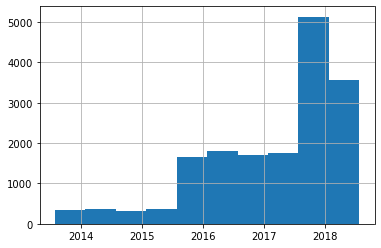

In [123]:
profile_copy.became_member_on.hist();

The profile for the simulated users joining the service looks like what one might expect for an app.  At first, there are a small number of users.  Over time, that builds and finally starts to decline as users find a newer app or it is replaced.

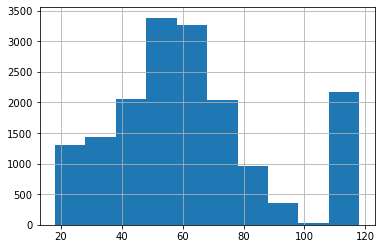

In [124]:
profile_copy.age.hist();

Looking at a histogram of Age, we can see that age seems to be bimodal.  There is what appears to be a normal distirbution to the left and another peak at 118 years of age.  While it is possible these are errors, it is also possible this is a subset of individuals who chose not to provide their birth date.  We will evaluate the effect of age on promotion success and will include age group 118 as a separate bin.

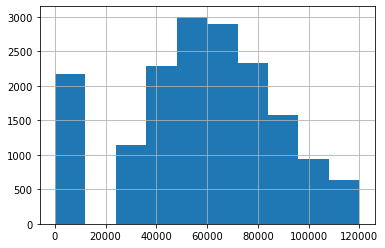

In [125]:
profile_copy.income.hist();

While income appears bimodal, there are are over 2000 users who are missing income data.  The remaining users appear to be in a nearly normal distribution.

In [126]:
profile_copy.describe()

,age,income,user_id,membership_tenure
count,17000.000000,17000.000000,17000.000000,17000.000000
mean,62.531412,57036.872059,8500.500000,517.449882
std,26.738580,29734.289938,4907.621624,411.223904
min,18.000000,-1.000000,1.000000,0.000000
25%,45.000000,40000.000000,4250.750000,208.000000
50%,58.000000,59000.000000,8500.500000,358.000000
75%,73.000000,76000.000000,12750.250000,791.000000
max,118.000000,120000.000000,17000.000000,1823.000000


Looking at income, the  median income is $64,000.  The largest reported income in the group was 120,000 and it was reported by user 17000.  Missing income information was assigned to -1 value.

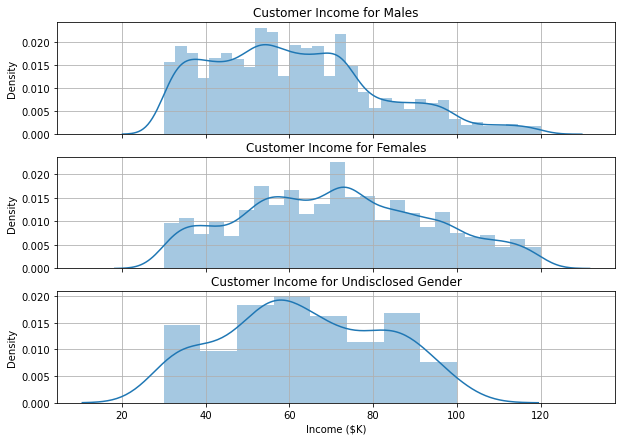

In [127]:
female = profile[profile.gender=='M']
male = profile[profile.gender=='F']
other = profile[profile.gender=='O']

fig, (ax1, ax2, ax3)  = plt.subplots(3,1,figsize = (10,7), sharex=True)


sns.distplot(female['income']* 1E-3, ax=ax1)
ax1.grid()
ax1.set_xlabel("Income ($K)")
ax1.set_title('Customer Income for Males')


sns.distplot(male['income']* 1E-3, ax=ax2)
ax2.grid()
ax2.set_xlabel('Income ($K)')
ax2.set_title('Customer Income for Females')


sns.distplot(other['income']* 1E-3, ax=ax3)
ax3.grid()
ax3.set_xlabel('Income ($K)')
ax3.set_title('Customer Income for Undisclosed Gender');



Females seem to report a slightly higher mean income than males.  All of the distributions appear to be multimodal.

## Data Exploration and Visualization

### Question - What does the income look like for users by age and gender?

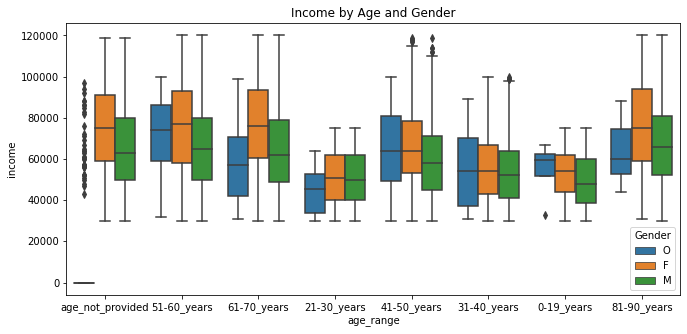

In [128]:
plt.figure(figsize=(11,5))
ax = sns.boxplot(data=profile_copy, x='age_range', y='income', hue='gender')
ax.set_title('Income by Age and Gender')
ax.legend(title='Gender');

### Question - Which offers are the most successful?

We start by merging trans_final_summary with profile_copy to provide full views for by segment and group.  We can then display the percentage in each group.  The tables below display percent effectiveness in each of the following ways:

1) Overall by offer<br>
2) By Member Tenure Offer Number and Group<br>
3) Age Range, Offer Number, and Group<br>
4) Offer Type (BOGO, Discount, Informational), Offer Number and Group

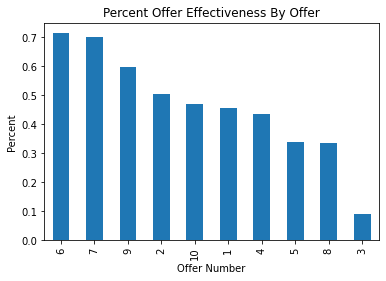

In [129]:
tenure = transcript_final.merge(profile_copy[['user_id', 'income', 'income_range', 'age_range','member_tenure_group' ]],
                                on = 'user_id', how = 'left')
figure, ax1 = plt.subplots(1,1)

tenure['effective'] = np.where(tenure.group==1, 1, 0)
av_tenure = tenure.groupby(['offer_number']).agg({'effective':'sum', 'offer_number': 'count'})
av_tenure['pct'] = av_tenure.effective/av_tenure.offer_number
av_tenure
av_tenure.pct.sort_values(ascending=False).plot(kind='bar')

ax1.set_title('Percent Offer Effectiveness By Offer')
ax1.set_xlabel('Offer Number')
ax1.set_ylabel('Percent')
plt.show()


Using groupby and aggregation, we can also see percentage of effective offer by member tenure group, offer number and group.

In [130]:
trans_profile_summary = trans_final_summary.merge(profile_copy, on='user_id', how='left')

In [131]:
trans_final_summary.head()

,user_id,offer_number,viewed_valid,trans_aft_view,comp_aft_view,comp_aft_trans,received,viewed,tot_trans,transaction,amount,completed,group,offer_type
0,1,5,1,0,0,0,1,1,0,0,0.0,0,2.0,discount
1,1,6,1,0,1,0,1,1,0,0,0.0,1,1.0,discount
2,1,7,1,1,0,1,1,1,9,1,20.4,1,1.0,discount
3,1,10,1,0,0,0,1,1,0,0,0.0,0,2.0,discount
4,2,3,0,0,0,0,1,0,0,0,0.0,0,4.0,informational


In [132]:
trans_profile_summary.head()

,user_id,offer_number,viewed_valid,trans_aft_view,comp_aft_view,comp_aft_trans,received,viewed,tot_trans,transaction,amount,completed,group,offer_type,gender,age,became_member_on,income,age_range,income_range,membership_tenure,member_tenure_group
0,1,5,1,0,0,0,1,1,0,0,0.0,0,2.0,discount,O,118,2017-02-12,-1.0,age_not_provided,income_not_provided,529,1_to_3_years
1,1,6,1,0,1,0,1,1,0,0,0.0,1,1.0,discount,O,118,2017-02-12,-1.0,age_not_provided,income_not_provided,529,1_to_3_years
2,1,7,1,1,0,1,1,1,9,1,20.4,1,1.0,discount,O,118,2017-02-12,-1.0,age_not_provided,income_not_provided,529,1_to_3_years
3,1,10,1,0,0,0,1,1,0,0,0.0,0,2.0,discount,O,118,2017-02-12,-1.0,age_not_provided,income_not_provided,529,1_to_3_years
4,2,3,0,0,0,0,1,0,0,0,0.0,0,4.0,informational,F,55,2017-07-15,112000.0,51-60_years,100000-120000,376,1_to_3_years


In [133]:

df=trans_profile_summary

effective_offer = df.groupby(['member_tenure_group', 'offer_number', 'group']).agg({'group': 'count'})
pct_offer = effective_offer/effective_offer.groupby(level=0).sum()
pct_offer.unstack()

group                              
group                                  1.0       2.0       3.0       4.0
member_tenure_group offer_number                                        
1_to_3_years        1             0.052992  0.016186  0.019609  0.011672
                    2             0.057661  0.031359  0.010661  0.003268
                    3             0.002179  0.057038  0.001012  0.038907
                    4             0.038752  0.006770  0.012528  0.039219
                    5             0.026301  0.008404  0.004825  0.065209
                    6             0.076025  0.010738  0.010038  0.002646
                    7             0.075403  0.000311  0.019765  0.001790
                    8             0.012839  0.075714  0.002023  0.010738
                    9             0.068322  0.005914  0.022800  0.003424
                    10            0.037740  0.010816  0.008949  0.039452
3_to_5_years        1             0.043689  0.021650  0.025545  0.011520
                    2             0.046305  0.040405  0.010018  0.002838
                    3             0.001948  0.058159  0.000779  0.039403
                    4             0.039682  0.009406  0.011966  0.040572
                    5             0.025378  0.008793  0.003562  0.063947
                    6             0.074633  0.010574  0.006679  0.003618
                    7             0.075801  0.000612  0.021761  0.003172
                    8             0.011465  0.074187  0.002950  0.011409
                    9             0.059773  0.009294  0.025434  0.002616
                    10            0.041908  0.012522  0.007736  0.038290
less_than_1_year    1             0.027629  0.035139  0.027197  0.009859
                    2             0.027938  0.059183  0.008746  0.003245
                    3             0.001762  0.052261  0.000371  0.045832
                    4             0.024446  0.019934  0.011559  0.045122
                    5             0.014525  0.020274  0.002472  0.061254
                    6             0.048459  0.045369  0.005563  0.003214
                    7             0.046327  0.010013  0.041042  0.003152
                    8             0.010199  0.078221  0.001453  0.009302
                    9             0.037117  0.023426  0.035232  0.003430
                    10            0.022808  0.025126  0.006181  0.045616

To interpret the table above, the values in each member_tenure_group sum to 1.0 or 100 percent. 

Group 1<br>
* Looking at the table for group 1 in the 1 to 3 year segment, the three most effective offers are 6 (7.6%), 7 (7.5%) and 9 (6.8%) for all users. <br>
* For the 3 to 5 year segment, offers 7 (7.6%), 6 (7.5%) and 9 (6.0%) are also the most popular, with 7 having a slightly higher percentage in the effective group. <br>
* In the less than 1 year segment, offers 6, 7, and 9 are also the most effective.<br>

In summary, offers 6, 7, and 9 are the most effective offers within the group 1 segment.


In [134]:
df=trans_profile_summary

effective_offer = df.groupby(['age_range', 'offer_number', 'group']).agg({'group': 'count'})
pct_offer = effective_offer/effective_offer.groupby(level=0).sum()
pct_offer.unstack()

group                              
group                               1.0       2.0       3.0       4.0
age_range        offer_number                                        
0-19_years       1             0.028045  0.031250  0.036058  0.004808
                 2             0.026442  0.075321  0.007212  0.002404
                 3             0.002404  0.036859       NaN  0.059295
                 4             0.014423  0.008814  0.015224  0.058494
                 5             0.010417  0.003205  0.001603  0.072917
                 6             0.059295  0.027244  0.011218  0.004808
                 7             0.044872  0.002404  0.034455  0.004006
                 8             0.016827  0.086538  0.002404  0.001603
                 9             0.044872  0.013622  0.040865  0.004006
                 10            0.021635  0.010417  0.001603  0.072115
21-30_years      1             0.027972  0.037296  0.030109  0.001943
                 2             0.025447  0.063326  0.009518  0.004468
                 3             0.000971  0.033217  0.001554  0.062160
                 4             0.022727  0.005439  0.010101  0.057692
                 5             0.012044  0.005051  0.000971  0.082751
                 6             0.061577  0.028166  0.008547  0.003497
                 7             0.057692  0.001748  0.039239  0.004274
                 8             0.012044  0.078477  0.002331  0.003885
                 9             0.046620  0.017871  0.034188  0.003497
                 10            0.020008  0.010878  0.005828  0.064880
31-40_years      1             0.040672  0.030361  0.028260  0.004201
                 2             0.037044  0.046973  0.008593  0.003628
                 3             0.001337  0.042391  0.001146  0.053466
                 4             0.028451  0.008784  0.013557  0.053657
                 5             0.017567  0.008020  0.001909  0.076189
                 6             0.066832  0.024823  0.008211  0.003246
                 7             0.061677  0.002482  0.033798  0.003246
                 8             0.011648  0.081917  0.001719  0.002673
                 9             0.047546  0.011075  0.028451  0.003437
                 10            0.030743  0.011266  0.007256  0.051747
41-50_years      1             0.046237  0.025816  0.022990  0.008990
                 2             0.045852  0.044824  0.010018  0.003211
                 3             0.001798  0.061778  0.000642  0.037760
                 4             0.041870  0.011816  0.009376  0.035577
                 5             0.026329  0.011816  0.004110  0.056640
                 6             0.066401  0.021962  0.006165  0.003339
                 7             0.062034  0.006679  0.028256  0.003339
                 8             0.012458  0.073722  0.002183  0.008220
                 9             0.051760  0.016954  0.027871  0.003982
                 10            0.039430  0.016183  0.006293  0.035320
51-60_years      1             0.044435  0.020041  0.022012  0.014867
                 2             0.050595  0.033429  0.010103  0.003285
                 3             0.001889  0.057577  0.000493  0.040164
                 4             0.037618  0.011253  0.011088  0.042464
                 5             0.025216  0.011417  0.004353  0.064641
                 6             0.065298  0.021602  0.006571  0.003039
                 7             0.068008  0.005667  0.023080  0.002628
                 8             0.010595  0.076797  0.001232  0.010842
                 9             0.056345  0.013060  0.025051  0.002300
                 10            0.036797  0.013634  0.008789  0.041725
61-70_years      1             0.045366  0.020276  0.022868  0.012869
                 2             0.046385  0.040830  0.010092  0.003333
                 3             0.001574  0.052495  0.000185  0.042959
                 4             0.034256  0.010462  0.010092  0.044070
                 5             0.022313  0.0

To interpret the table above, the values in each age segment sum to 1.0 or 100%.

If we again concentrate on group 1 (effective):

* For all age segments offer numbers 6, 7 and 9 are the most effective.  This is supported by the bar graph above.



In [135]:
df=trans_final_summary

effective_offer = df.groupby(['offer_type', 'offer_number', 'group']).agg({'group': 'count'})
pct_offer = effective_offer/effective_offer.groupby(level=1).sum()
pct_offer

group
offer_type    offer_number group          
bogo          1            1.0    0.370882
                           2.0    0.272670
                           3.0    0.250078
                           4.0    0.106370
              2            1.0    0.391785
                           2.0    0.482148
                           3.0    0.094787
                           4.0    0.031280
              4            1.0    0.315657
                           2.0    0.141935
                           3.0    0.118017
                           4.0    0.424390
              9            1.0    0.504710
                           2.0    0.160626
                           3.0    0.302411
                           4.0    0.032253
discount      5            1.0    0.199090
                           2.0    0.145121
                           3.0    0.032319
                           4.0    0.623470
              6            1.0    0.615178
                           2.0    0.284901
                           3.0    0.067826
                           4.0    0.032095
              7            1.0    0.605429
                           2.0    0.053662
                           3.0    0.312184
                           4.0    0.028725
              10           1.0    0.314558
                           2.0    0.187271
                           3.0    0.072235
                           4.0    0.425935
informational 3            1.0    0.018954
                           2.0    0.549044
                           3.0    0.006160
                           4.0    0.425841
              8            1.0    0.111058
                           2.0    0.766809
                           3.0    0.019934
                           4.0    0.102199

To understand how to view this table, the numbers to the right of each offer number sum to 1.0 or 100%.

Looking at the table above, evaluating success within each promotion, offers in group 1 are considered successful.<br>
* We can see that offers 9 has the higest success with 50%.  2 has the next higest percentage with 39% and 1 has 38%.<br>  
* Offers 4 and 9 had some success, but less than 20%.  The cost of the offerings would need to be evaluated to determine to what extent they should be used.<br>  
* Informational offers had much lower percentage in the effective offer group.  Their largest percentage is in group 2, where offers were viewed but found ineffective.  Product management should consider the cost/benefit of offering these promotions.

All of the customers in group 3 purchased products, despite receiving offers.  These are Starbuck's loyal customers. 

Group 4 customers did not respond.  Perhaps Starbucks should consider not providing offers to this group as the offers are unlikely to be accepted.

In preparation for responding to subsequent questons, the following function was created.  This displays a bar chart using the supplied inputs.  This reduces unnecessary duplication of code.

In [136]:
def summary_bar(df, x_variable, y_variable, agg_variable, agg_type, chart_title='Title', xlab = 'N/A', ylab = 'N/A'):
    '''
    Plots a bar chart from dataframe based on variables supplied by the user
    
    Inputs:
    df = dataframe to be plotted
    
    x_variable = the variable to be displayed on the x axis
    
    y_variable = the variable to be displayed on the y axis
    
    agg_variable = variable to be aggregated
    
    agg_type = the type of aggregation used ['count', 'sum', 'mean']
    
    chart_title = the title to be used for the chart
    
    Outputs: 
    
    an SNS barplot of the dataframe and variables provided
    '''
    figure, ax = plt.subplots(1,1)
    m2= df.groupby([y_variable]).agg({ agg_variable: [agg_type]}).reset_index()
    columns = [y_variable, x_variable]
    m2.columns = columns
    ax = sns.barplot(y=y_variable, x=x_variable, data=m2)
    ax.set_title(chart_title)
    ax.set_xlabel(xlab)
    ax.set_ylabel(ylab)
    

    
    return ax;
    


### Do males or females appear more likely to respond to offers?

To answer this question, we merge profile data with trans_final_summary, focusing on users assigned to group 1

In [137]:
m1 = trans_final_summary[trans_final_summary['group']== 1]
m1 = m1.merge(profile_copy, on='user_id', how='left')

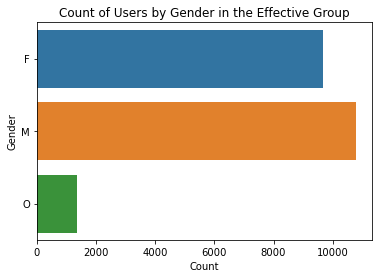

In [138]:
summary_bar(m1, 'user_count', 'gender', 'group', 'sum',  'Count of Users by Gender in the Effective Group', 'Count', 'Gender');

There appear to be a slightly larger group of males reached by the effective offers.

### Which offers are more effective for each gender

To answer this question, we will continue to use the m1 dataframe.  This contains only group 1 user data.  The table below identifies the percentage effectiveness by gender, and offer number.

In [139]:
df=m1

effective_offer = df.groupby(['gender','offer_number']).agg({'gender': 'count'})
pct_offer = effective_offer/effective_offer.groupby(level=1).sum()
pct_offer.unstack()

gender                                                    \
offer_number        1         2         3         4         5         6    
gender                                                                     
F             0.498308  0.519355  0.266667  0.440179  0.457841  0.407864   
M             0.473773  0.457258  0.508333  0.492522  0.500394  0.514778   
O             0.027919  0.023387  0.225000  0.067298  0.041765  0.077358   

                                                      
offer_number        7         8         9         10  
gender                                                
F             0.424400  0.346154  0.441316  0.431462  
M             0.498957  0.504274  0.494147  0.508852  
O             0.076642  0.149573  0.064537  0.059686

Looking at the table above, offers 1 and 2 are slightly more effective for female when compared to simulated male users.  Offers 4, 6, 7, 9 and 10 had at least a 6% difference in effectivenes compared to the simulated female users.  

### Question - How does the total amount spent vary by gender?

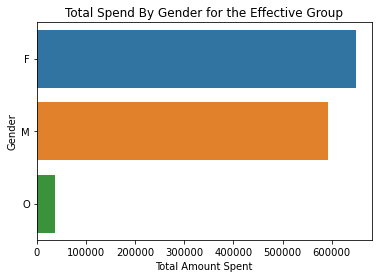

In [140]:
summary_bar(m1, 'gender_spend', 'gender','amount', 'sum', 'Total Spend By Gender for the Effective Group',
            'Total Amount Spent', 'Gender' );

While the effective offer group has slightly more Male users than Female, the Female users are spending more. 

### Question - How does the total number of transactions for effective offers compare by gender?

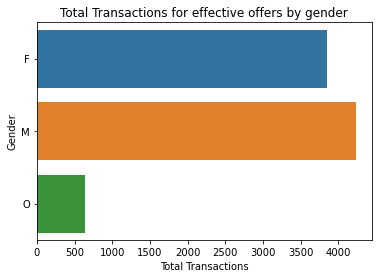

In [141]:
summary_bar(m1, 'transactions', 'gender','transaction', 'sum', 'Total Transactions for effective offers by gender',
           'Total Transactions', 'Gender' );

While female users spend more than males, the males have a larger number of transactions.

### Question - What types of effective offer does each gender seem to prefer?

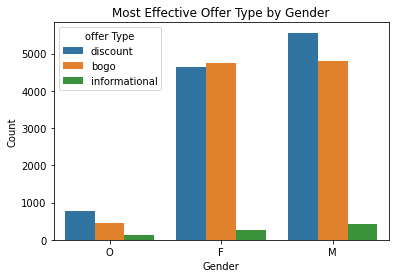

In [142]:

figure, ax = plt.subplots(1,1)
x = sns.countplot(x = 'gender', hue= 'offer_type', data = m1)
ax.set_title('Most Effective Offer Type by Gender')
ax.set_xlabel('Gender')
ax.set_ylabel('Count')
ax.legend(title='offer Type')
plt.show()

For females, discount and gender are almost equally prefered, while males clearly prefer discount.  Users with undefined gender clearly preferred discount to BOGO.  In all cases, informational promos were least preferred.

### Question - What is the average price per transaction for each group

In [143]:
grp_list = [1,2,3,4]
amt_spent = []
for grp in grp_list:
    
    grp_hold = transcript_final[transcript_final['group']==grp]
    count_trans = grp_hold.transaction.sum()
    ave_trans = grp_hold.amount.sum()/count_trans
    amt =('Average price per transaction for the effective offers in Group {} is: {}'.format(grp, round(ave_trans,2)))
    amt_spent.append(amt)

In [144]:
from matplotlib.ticker import FormatStrFormatter

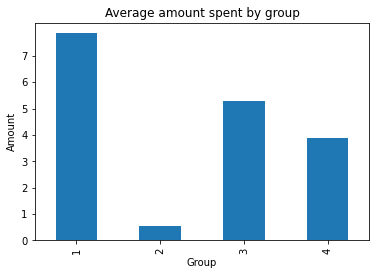

group    1.0   2.0   3.0   4.0
amount  7.85  0.53  5.29  3.87


In [145]:

figure, ax = plt.subplots(1,1)
av_transact = transcript_final.groupby(['group']).agg({'amount': 'mean'}).unstack()
av_transact.plot(kind='bar')
ax.set_xticklabels(('1', '2', '3', '4'))
ax.set_title('Average amount spent by group')
ax.set_xlabel('Group')
ax.set_ylabel('Amount')
ax.yaxis.set_ticks(np.arange(0, 8.0, 1))
plt.show()
print(round(av_transact,2).unstack())

The data seems to confirm that users assigned to group 1 (effective offers) spend more than those in group 3 (customers who purchase regardless of offer).  While this would seem to indicate it makes sense to provide these promotions, financial analysis would need to be conducted to ensure there is a cost benefit.

### Question - What are the total number of transactions for each group

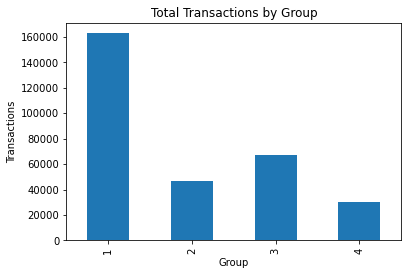

In [146]:

figure, ax = plt.subplots(1,1)
transcript_final.groupby(['group']).agg({'trans': 'count'}).unstack().plot(kind='bar')
ax.set_xticklabels(('1', '2', '3', '4'))
ax.set_title('Total Transactions by Group')
ax.set_xlabel('Group')
ax.set_ylabel('Transactions')
plt.show()


Group 1 has the most transactions (effective offers), followed by group 3 (purchase regardless).

### Question - Is there a difference in the average user spend by membership tenure?

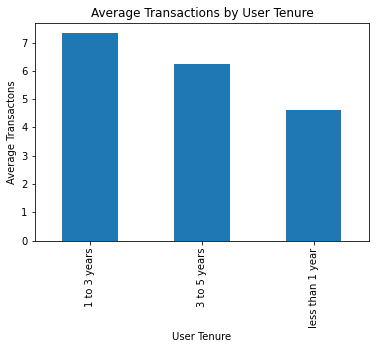

member_tenure_group  1_to_3_years  3_to_5_years  less_than_1_year
amount                       7.32          6.26              4.61


In [147]:

figure, ax = plt.subplots(1,1)
av_tenure = tenure.groupby(['member_tenure_group']).agg({'amount': 'mean'}).unstack()
av_tenure.plot(kind='bar')
ax.set_xticklabels(('1 to 3 years', '3 to 5 years', 'less than 1 year'))
ax.set_title('Average Transactions by User Tenure')
ax.set_xlabel('User Tenure')
ax.set_ylabel('Average Transactons')
plt.show()
print(round(av_tenure,2).unstack())


Customers in the 1-3 year tenure group tended to purchase more, followed by the 3-5 year group.  

### Question - How does income differ by membership tenure?

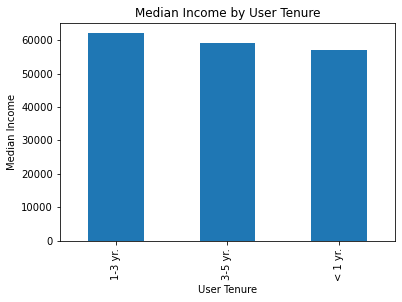

member_tenure_group  1_to_3_years  3_to_5_years  less_than_1_year
income                    62000.0       59000.0           57000.0


In [194]:
tenure = transcript_final.merge(profile_copy[['user_id', 'income_range', 'age_range','member_tenure_group', 'income' ]],
                                on = 'user_id', how = 'left')
figure, ax1 = plt.subplots(1,1)
av_tenure1 = tenure.groupby(['member_tenure_group']).agg({'income': 'median'}).unstack()
av_tenure1.plot(kind='bar')
ax1.set_xticklabels(('1-3 yr.', '3-5 yr.', '< 1 yr.'))
ax1.set_title('Median Income by User Tenure')
ax1.set_xlabel('User Tenure')
ax1.set_ylabel('Median Income')
plt.show()
print(round(av_tenure1,2).unstack())

There appear to be slight differences in median income.  Users in the 1-3 year range have 62,000 dollars in median annual income, while users in the 3-5 year range have 59,000 dollars in median annual income

### Question - What is the average income by age segment?

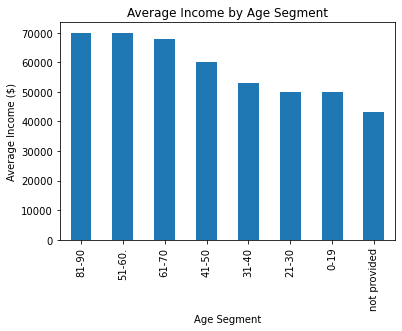

age_range  0-19_years  21-30_years  31-40_years  41-50_years  51-60_years  \
income        50000.0      50000.0      53000.0      60000.0      70000.0   

age_range  61-70_years  81-90_years  age_not_provided  
income         68000.0      70000.0           43000.0  


In [149]:
figure, ax1 = plt.subplots(1,1)
av_tenure1 = tenure.groupby(['age_range']).agg({'income': 'median'}).unstack().sort_values(ascending=False)
av_tenure1.plot(kind='bar')
ax1.set_xticklabels(('81-90', '51-60.', '61-70', '41-50', '31-40', '21-30', '0-19', 'not provided'))
ax1.set_title('Average Income by Age Segment')
ax1.set_xlabel('Age Segment')
ax1.set_ylabel('Average Income ($)')
plt.show()
print(round(av_tenure1,2).unstack())

### Question - Which offers had the most transactions?

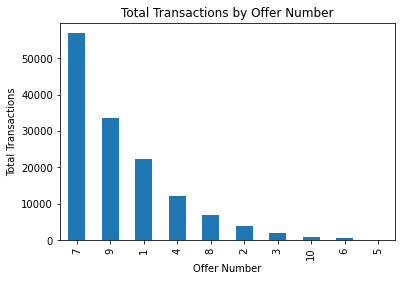

offer_number     1     2     3      4   5    6      7     8      9    10
trans         22229  3975  1836  12075  66  427  56916  6948  33680  801


In [150]:

av_tenure = tenure.groupby(['offer_number']).agg({'trans': 'sum', }).unstack().sort_values(ascending=False)
figure, ax = plt.subplots(1,1)
av_tenure.plot(kind='bar')
ax.set_xticklabels(('7', '9', '1', '4', '8', '2', '3', '10', '6', '5'))
ax.set_title('Total Transactions by Offer Number')
ax.set_xlabel('Offer Number')
ax.set_ylabel('Total Transactions')

plt.show()
print(round(av_tenure,2).unstack())


We can clearly see from the bar chart and table above that offer number 7 had the largest number of transactions, followed by 9 and 1.

### Question - Which media was used for each offer?

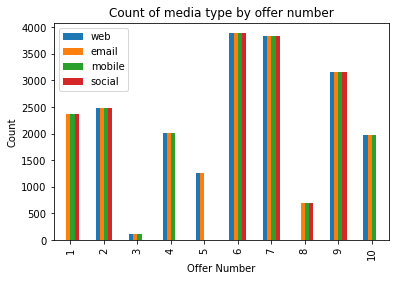

In [152]:
# offer type distribution by channels
tenure1 = m1.merge(portfolio_clean, left_on='offer_number', right_on='offer_number', how='left')
tenure2 = tenure1.groupby(['group', 'offer_number']).agg({'web': 'sum','email': 'sum','mobile': 'sum','social':'sum' })


ax2=tenure2.plot(kind='bar')
ax2.set_xticklabels(('1', '2', '3', '4', '5','6', '7', '8', '9', '10'))
ax2.set_title('Count of media type by offer number')
ax2.set_xlabel('Offer Number')
ax2.set_ylabel('Count');
plt.show()


Looking at the bar chart, offers 6, 7 and 9 had the largest number of media types, reaching the largest number of users.  Offers 3, 4, 5, 8 and 10 had fewer media types than the other offers.

In [153]:
trans_profile = transcript_final.merge(profile_copy, on = 'user_id', how='left')


In [154]:
trans_final_summary.head()

,user_id,offer_number,viewed_valid,trans_aft_view,comp_aft_view,comp_aft_trans,received,viewed,tot_trans,transaction,amount,completed,group,offer_type
0,1,5,1,0,0,0,1,1,0,0,0.0,0,2.0,discount
1,1,6,1,0,1,0,1,1,0,0,0.0,1,1.0,discount
2,1,7,1,1,0,1,1,1,9,1,20.4,1,1.0,discount
3,1,10,1,0,0,0,1,1,0,0,0.0,0,2.0,discount
4,2,3,0,0,0,0,1,0,0,0,0.0,0,4.0,informational


## Data Modeling

### Data Preparation for modeling


In [155]:
trans_ml = trans_profile_summary.copy(deep=False)
trans_ml['discount'] = np.where(trans_ml.offer_type == 'discount', 1, 0)
trans_ml['bogo'] = np.where(trans_ml.offer_type == 'bogo', 1, 0)
trans_ml['informational'] = np.where(trans_ml.offer_type == 'informational', 1, 0)
trans_ml['group1'] = np.where(trans_ml.group == 1, 1, 0)
trans_ml['group2'] = np.where(trans_ml.group == 2, 1, 0)
trans_ml['group3'] = np.where(trans_ml.group == 3, 1, 0)
trans_ml['group4'] = np.where(trans_ml.group == 4, 1, 0)
trans_ml['age_not_provided'] = np.where(trans_ml.age_range == 'age_not_provided', 1, 0)
trans_ml['0-19_years'] = np.where(trans_ml.age_range == '0-19_years', 1, 0)
trans_ml['21-30_years'] = np.where(trans_ml.age_range == '21-30_years', 1, 0)
trans_ml['31-40_years'] = np.where(trans_ml.age_range == '31-40_years', 1, 0)
trans_ml['41-50_years'] = np.where(trans_ml.age_range == '41-50_years', 1, 0)
trans_ml['51-60_years'] = np.where(trans_ml.age_range == '51-60_years', 1, 0)
trans_ml['61-70_years'] = np.where(trans_ml.age_range == '61-70_years', 1, 0)
trans_ml['71-80_years'] = np.where(trans_ml.age_range == '71-80_years', 1, 0)
trans_ml['81-90_years'] = np.where(trans_ml.age_range == '81-90_years', 1, 0)


trans_ml = trans_ml.drop(['offer_type','group'], axis=1)
trans_ml.head(200)

,user_id,offer_number,viewed_valid,trans_aft_view,comp_aft_view,comp_aft_trans,received,viewed,tot_trans,transaction,amount,completed,gender,age,became_member_on,income,age_range,income_range,membership_tenure,member_tenure_group,discount,bogo,informational,group1,group2,group3,group4,age_not_provided,0-19_years,21-30_years,31-40_years,41-50_years,51-60_years,61-70_years,71-80_years,81-90_years
0,1,5,1,0,0,0,1,1,0,0,0.00,0,O,118,2017-02-12,-1.0,age_not_provided,income_not_provided,529,1_to_3_years,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
1,1,6,1,0,1,0,1,1,0,0,0.00,1,O,118,2017-02-12,-1.0,age_not_provided,income_not_provided,529,1_to_3_years,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
2,1,7,1,1,0,1,1,1,9,1,20.40,1,O,118,2017-02-12,-1.0,age_not_provided,income_not_provided,529,1_to_3_years,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
3,1,10,1,0,0,0,1,1,0,0,0.00,0,O,118,2017-02-12,-1.0,age_not_provided,income_not_provided,529,1_to_3_years,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
4,2,3,0,0,0,0,1,0,0,0,0.00,0,F,55,2017-07-15,112000.0,51-60_years,100000-120000,376,1_to_3_years,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0
5,2,4,0,0,0,0,1,0,3,1,77.01,1,F,55,2017-07-15,112000.0,51-60_years,100000-120000,376,1_to_3_years,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0
6,3,4,1,1,0,0,1,1,6,1,14.30,0,O,118,2018-07-12,-1.0,age_not_provided,income_not_provided,14,less_than_1_year,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0
7,3,8,1,0,0,0,1,1,0,0,0.00,0,O,118,2018-07-12,-1.0,age_not_provided,income_not_provided,14,less_than_1_year,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0
8,4,1,1,0,1,0,1,1,0,0,0.00,1,F,75,2017-05-09,100000.0,age_not_provided,100000-120000,443,1_to_3_years,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0
9,4,4,1,0,1,0,1,1,0,0,0.00,1,F,75,2017-05-09,100000.0,age_not_provided,100000-120000,443,1_to_3_years,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0


In [156]:
trans_ml.head()

,user_id,offer_number,viewed_valid,trans_aft_view,comp_aft_view,comp_aft_trans,received,viewed,tot_trans,transaction,amount,completed,gender,age,became_member_on,income,age_range,income_range,membership_tenure,member_tenure_group,discount,bogo,informational,group1,group2,group3,group4,age_not_provided,0-19_years,21-30_years,31-40_years,41-50_years,51-60_years,61-70_years,71-80_years,81-90_years
0,1,5,1,0,0,0,1,1,0,0,0.0,0,O,118,2017-02-12,-1.0,age_not_provided,income_not_provided,529,1_to_3_years,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
1,1,6,1,0,1,0,1,1,0,0,0.0,1,O,118,2017-02-12,-1.0,age_not_provided,income_not_provided,529,1_to_3_years,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
2,1,7,1,1,0,1,1,1,9,1,20.4,1,O,118,2017-02-12,-1.0,age_not_provided,income_not_provided,529,1_to_3_years,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
3,1,10,1,0,0,0,1,1,0,0,0.0,0,O,118,2017-02-12,-1.0,age_not_provided,income_not_provided,529,1_to_3_years,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
4,2,3,0,0,0,0,1,0,0,0,0.0,0,F,55,2017-07-15,112000.0,51-60_years,100000-120000,376,1_to_3_years,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0


In [157]:
# identify effective offer for use in analysis
trans_ml['effective_offer'] = np.where(trans_ml.group1 == 1, 1, 0)
trans_ml.head()

,user_id,offer_number,viewed_valid,trans_aft_view,comp_aft_view,comp_aft_trans,received,viewed,tot_trans,transaction,amount,completed,gender,age,became_member_on,income,age_range,income_range,membership_tenure,member_tenure_group,discount,bogo,informational,group1,group2,group3,group4,age_not_provided,0-19_years,21-30_years,31-40_years,41-50_years,51-60_years,61-70_years,71-80_years,81-90_years,effective_offer
0,1,5,1,0,0,0,1,1,0,0,0.0,0,O,118,2017-02-12,-1.0,age_not_provided,income_not_provided,529,1_to_3_years,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
1,1,6,1,0,1,0,1,1,0,0,0.0,1,O,118,2017-02-12,-1.0,age_not_provided,income_not_provided,529,1_to_3_years,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1
2,1,7,1,1,0,1,1,1,9,1,20.4,1,O,118,2017-02-12,-1.0,age_not_provided,income_not_provided,529,1_to_3_years,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1
3,1,10,1,0,0,0,1,1,0,0,0.0,0,O,118,2017-02-12,-1.0,age_not_provided,income_not_provided,529,1_to_3_years,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
4,2,3,0,0,0,0,1,0,0,0,0.0,0,F,55,2017-07-15,112000.0,51-60_years,100000-120000,376,1_to_3_years,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0


### Data Preprocessing for Model


In this analysis, we will be evaluating the DecisionTree and RainForest machine learning classifiers.  The DecisionTree classifier uses a series of decisions to determin the class labels.  RandomForest uses a collection of trees.  It tends to have higher accuracy than an individual decision tree.  Ituses bagging (faking extra training data) and random feature subsets for each tree.  We will focus effective_offer as the y value and transaction data and some engineered featues as our features.  Let's start by creating our machine learning datset.

In [162]:
# make a copy of transcript_final dataframe
ml_test = transcript_final.copy(deep=False)
ml_test.head()

,level_0,index,event,time,amount,reward,transaction,user_id,offer_number,offer_id_previous,event_subsequent,viewed_valid,trans_aft_view,comp_aft_view,comp_aft_trans,received,viewed,trans,completed,group,max_duration,group1,grp_time,grp_new
0,0,110828,offer received,336,0.0,0.0,0,1,5,5.0,offer viewed,1,0,0,0,1,0,0,0,2.0,240,2.0,0,2.0
1,1,130147,offer viewed,348,0.0,0.0,0,1,5,NaN,NaN,0,0,0,0,0,1,0,0,2.0,240,2.0,0,2.0
2,2,201570,offer received,504,0.0,0.0,0,1,6,6.0,offer viewed,1,0,0,0,1,0,0,0,1.0,168,1.0,0,1.0
3,3,214274,offer viewed,504,0.0,0.0,0,1,6,6.0,offer completed,0,0,1,0,0,1,0,0,1.0,168,1.0,0,1.0
4,4,237366,offer completed,552,0.0,3.0,0,1,6,NaN,NaN,0,0,0,0,0,0,0,1,1.0,168,1.0,0,1.0


Next, we add values to be included with the features.

In [163]:
# merge ml_test with profile information.
ml_test = ml_test.merge(profile_copy[['user_id', 'gender', 'age', 'income', 'membership_tenure']], on='user_id', how='left')
ml_test.head()

,level_0,index,event,time,amount,reward,transaction,user_id,offer_number,offer_id_previous,event_subsequent,viewed_valid,trans_aft_view,comp_aft_view,comp_aft_trans,received,viewed,trans,completed,group,max_duration,group1,grp_time,grp_new,gender,age,income,membership_tenure
0,0,110828,offer received,336,0.0,0.0,0,1,5,5.0,offer viewed,1,0,0,0,1,0,0,0,2.0,240,2.0,0,2.0,O,118,-1.0,529
1,1,130147,offer viewed,348,0.0,0.0,0,1,5,NaN,NaN,0,0,0,0,0,1,0,0,2.0,240,2.0,0,2.0,O,118,-1.0,529
2,2,201570,offer received,504,0.0,0.0,0,1,6,6.0,offer viewed,1,0,0,0,1,0,0,0,1.0,168,1.0,0,1.0,O,118,-1.0,529
3,3,214274,offer viewed,504,0.0,0.0,0,1,6,6.0,offer completed,0,0,1,0,0,1,0,0,1.0,168,1.0,0,1.0,O,118,-1.0,529
4,4,237366,offer completed,552,0.0,3.0,0,1,6,NaN,NaN,0,0,0,0,0,0,0,1,1.0,168,1.0,0,1.0,O,118,-1.0,529


This includes offer (portfolio) information as well.

In [164]:
# merge ml_test with portfolio_clean to add offer information
ml_test = ml_test.merge(portfolio_clean, on='offer_number', how = 'left')
ml_test.head()

,level_0,index,event,time,amount,reward_x,transaction,user_id,offer_number,offer_id_previous,event_subsequent,viewed_valid,trans_aft_view,comp_aft_view,comp_aft_trans,received,viewed,trans,completed,group,max_duration_x,group1,grp_time,grp_new,gender,age,income,membership_tenure,difficulty,duration,offer_type,reward_y,email,mobile,social,web,bogo,discount,informational,max_duration_y
0,0,110828,offer received,336,0.0,0.0,0,1,5,5.0,offer viewed,1,0,0,0,1,0,0,0,2.0,240,2.0,0,2.0,O,118,-1.0,529,20,10,discount,5,1,0,0,1,0,1,0,240
1,1,130147,offer viewed,348,0.0,0.0,0,1,5,NaN,NaN,0,0,0,0,0,1,0,0,2.0,240,2.0,0,2.0,O,118,-1.0,529,20,10,discount,5,1,0,0,1,0,1,0,240
2,2,201570,offer received,504,0.0,0.0,0,1,6,6.0,offer viewed,1,0,0,0,1,0,0,0,1.0,168,1.0,0,1.0,O,118,-1.0,529,7,7,discount,3,1,1,1,1,0,1,0,168
3,3,214274,offer viewed,504,0.0,0.0,0,1,6,6.0,offer completed,0,0,1,0,0,1,0,0,1.0,168,1.0,0,1.0,O,118,-1.0,529,7,7,discount,3,1,1,1,1,0,1,0,168
4,4,237366,offer completed,552,0.0,3.0,0,1,6,NaN,NaN,0,0,0,0,0,0,0,1,1.0,168,1.0,0,1.0,O,118,-1.0,529,7,7,discount,3,1,1,1,1,0,1,0,168


Now, we define the y variable, effective_offer, to be used in the machine learning models.

In [165]:
# create column identifying the effective offers
ml_test['effective_offer'] = np.where(ml_test.group ==1, 1,0)
ml_test.head()

,level_0,index,event,time,amount,reward_x,transaction,user_id,offer_number,offer_id_previous,event_subsequent,viewed_valid,trans_aft_view,comp_aft_view,comp_aft_trans,received,viewed,trans,completed,group,max_duration_x,group1,grp_time,grp_new,gender,age,income,membership_tenure,difficulty,duration,offer_type,reward_y,email,mobile,social,web,bogo,discount,informational,max_duration_y,effective_offer
0,0,110828,offer received,336,0.0,0.0,0,1,5,5.0,offer viewed,1,0,0,0,1,0,0,0,2.0,240,2.0,0,2.0,O,118,-1.0,529,20,10,discount,5,1,0,0,1,0,1,0,240,0
1,1,130147,offer viewed,348,0.0,0.0,0,1,5,NaN,NaN,0,0,0,0,0,1,0,0,2.0,240,2.0,0,2.0,O,118,-1.0,529,20,10,discount,5,1,0,0,1,0,1,0,240,0
2,2,201570,offer received,504,0.0,0.0,0,1,6,6.0,offer viewed,1,0,0,0,1,0,0,0,1.0,168,1.0,0,1.0,O,118,-1.0,529,7,7,discount,3,1,1,1,1,0,1,0,168,1
3,3,214274,offer viewed,504,0.0,0.0,0,1,6,6.0,offer completed,0,0,1,0,0,1,0,0,1.0,168,1.0,0,1.0,O,118,-1.0,529,7,7,discount,3,1,1,1,1,0,1,0,168,1
4,4,237366,offer completed,552,0.0,3.0,0,1,6,NaN,NaN,0,0,0,0,0,0,0,1,1.0,168,1.0,0,1.0,O,118,-1.0,529,7,7,discount,3,1,1,1,1,0,1,0,168,1


In [167]:
# create a copy of ml_test
ml_test2 = ml_test.copy(deep=False)

In [168]:
# validate copy
ml_test2.head()

,level_0,index,event,time,amount,reward_x,transaction,user_id,offer_number,offer_id_previous,event_subsequent,viewed_valid,trans_aft_view,comp_aft_view,comp_aft_trans,received,viewed,trans,completed,group,max_duration_x,group1,grp_time,grp_new,gender,age,income,membership_tenure,difficulty,duration,offer_type,reward_y,email,mobile,social,web,bogo,discount,informational,max_duration_y,effective_offer
0,0,110828,offer received,336,0.0,0.0,0,1,5,5.0,offer viewed,1,0,0,0,1,0,0,0,2.0,240,2.0,0,2.0,O,118,-1.0,529,20,10,discount,5,1,0,0,1,0,1,0,240,0
1,1,130147,offer viewed,348,0.0,0.0,0,1,5,NaN,NaN,0,0,0,0,0,1,0,0,2.0,240,2.0,0,2.0,O,118,-1.0,529,20,10,discount,5,1,0,0,1,0,1,0,240,0
2,2,201570,offer received,504,0.0,0.0,0,1,6,6.0,offer viewed,1,0,0,0,1,0,0,0,1.0,168,1.0,0,1.0,O,118,-1.0,529,7,7,discount,3,1,1,1,1,0,1,0,168,1
3,3,214274,offer viewed,504,0.0,0.0,0,1,6,6.0,offer completed,0,0,1,0,0,1,0,0,1.0,168,1.0,0,1.0,O,118,-1.0,529,7,7,discount,3,1,1,1,1,0,1,0,168,1
4,4,237366,offer completed,552,0.0,3.0,0,1,6,NaN,NaN,0,0,0,0,0,0,0,1,1.0,168,1.0,0,1.0,O,118,-1.0,529,7,7,discount,3,1,1,1,1,0,1,0,168,1


Now, we drop unnecessary varibales.

In [169]:
# drop unneeded columns
ml_test2 = ml_test2.drop(['user_id', 'reward_x', 'transaction', 'offer_id_previous', 'event_subsequent', 'event',
                          'time', 'received', 'viewed', 'trans', 'completed', 'group', 'max_duration_x', 
                          'group1', 'grp_time', 'grp_new', 'max_duration_y'], axis=1)
ml_test2.head()

,level_0,index,amount,offer_number,viewed_valid,trans_aft_view,comp_aft_view,comp_aft_trans,gender,age,income,membership_tenure,difficulty,duration,offer_type,reward_y,email,mobile,social,web,bogo,discount,informational,effective_offer
0,0,110828,0.0,5,1,0,0,0,O,118,-1.0,529,20,10,discount,5,1,0,0,1,0,1,0,0
1,1,130147,0.0,5,0,0,0,0,O,118,-1.0,529,20,10,discount,5,1,0,0,1,0,1,0,0
2,2,201570,0.0,6,1,0,0,0,O,118,-1.0,529,7,7,discount,3,1,1,1,1,0,1,0,1
3,3,214274,0.0,6,0,0,1,0,O,118,-1.0,529,7,7,discount,3,1,1,1,1,0,1,0,1
4,4,237366,0.0,6,0,0,0,0,O,118,-1.0,529,7,7,discount,3,1,1,1,1,0,1,0,1


In [170]:
# use get_dummies to convert objects to columns with values of 0 or 1
ml_test2 = pd.get_dummies(ml_test2)
ml_test2.head()

,level_0,index,amount,offer_number,viewed_valid,trans_aft_view,comp_aft_view,comp_aft_trans,age,income,membership_tenure,difficulty,duration,reward_y,email,mobile,social,web,bogo,discount,informational,effective_offer,gender_F,gender_M,gender_O,offer_type_bogo,offer_type_discount,offer_type_informational
0,0,110828,0.0,5,1,0,0,0,118,-1.0,529,20,10,5,1,0,0,1,0,1,0,0,0,0,1,0,1,0
1,1,130147,0.0,5,0,0,0,0,118,-1.0,529,20,10,5,1,0,0,1,0,1,0,0,0,0,1,0,1,0
2,2,201570,0.0,6,1,0,0,0,118,-1.0,529,7,7,3,1,1,1,1,0,1,0,1,0,0,1,0,1,0
3,3,214274,0.0,6,0,0,1,0,118,-1.0,529,7,7,3,1,1,1,1,0,1,0,1,0,0,1,0,1,0
4,4,237366,0.0,6,0,0,0,0,118,-1.0,529,7,7,3,1,1,1,1,0,1,0,1,0,0,1,0,1,0


In [171]:
# drop unneeded columns
ml_test2 = ml_test2.drop(['level_0', 'index'], axis=1)
ml_test2.head()

,amount,offer_number,viewed_valid,trans_aft_view,comp_aft_view,comp_aft_trans,age,income,membership_tenure,difficulty,duration,reward_y,email,mobile,social,web,bogo,discount,informational,effective_offer,gender_F,gender_M,gender_O,offer_type_bogo,offer_type_discount,offer_type_informational
0,0.0,5,1,0,0,0,118,-1.0,529,20,10,5,1,0,0,1,0,1,0,0,0,0,1,0,1,0
1,0.0,5,0,0,0,0,118,-1.0,529,20,10,5,1,0,0,1,0,1,0,0,0,0,1,0,1,0
2,0.0,6,1,0,0,0,118,-1.0,529,7,7,3,1,1,1,1,0,1,0,1,0,0,1,0,1,0
3,0.0,6,0,0,1,0,118,-1.0,529,7,7,3,1,1,1,1,0,1,0,1,0,0,1,0,1,0
4,0.0,6,0,0,0,0,118,-1.0,529,7,7,3,1,1,1,1,0,1,0,1,0,0,1,0,1,0


Next, we create the explanatory and response variables.  We chose effective_offer as the response variables and our features are the explanatory variables.  we will transform the variables to ensure that values greater than 1 (like age) do not create too much influence on the models.

In [172]:
# create the explanatory and response variables
X = ml_test2
X = X.drop(['effective_offer'], axis=1)
y = ml_test2['effective_offer']



# split the data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [173]:
# validate dummies creation was successful
X.columns.tolist()

['amount',
 'offer_number',
 'viewed_valid',
 'trans_aft_view',
 'comp_aft_view',
 'comp_aft_trans',
 'age',
 'income',
 'membership_tenure',
 'difficulty',
 'duration',
 'reward_y',
 'email',
 'mobile',
 'social',
 'web',
 'bogo',
 'discount',
 'informational',
 'gender_F',
 'gender_M',
 'gender_O',
 'offer_type_bogo',
 'offer_type_discount',
 'offer_type_informational']

In [174]:
# this code uses StandardScaler to ensure any large values are transformed to between 0 and 1.0
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)

#scale test data
X_test=scaler.transform(X_test)

### Model Selection

We start by comparing DecisionTreeClassifer to the RandomForestClassifier model.

In [175]:
# prepare the classifers to be used in KFold
clfs = [DecisionTreeClassifier(random_state=0), RandomForestClassifier(n_jobs=-1)]

nfolds = 10
kf = KFold(n_splits=nfolds,random_state=0,shuffle=True)

In [176]:
# this code compares DecisionTree to RandomForest classifiers and outputs best choice
maxAUC = -1
bestCL = ""
for cl in clfs:
    auc = cross_val_score(cl,X,y,cv=kf,n_jobs=-1,scoring='roc_auc').mean()
    print (str(cl) + ' ' + str(auc))
    if auc > maxAUC:
        bestCL = cl
        maxAUC = auc
print('--------------------------------------------------------------------------------------------')
print ('Best classifier choice is ===>> ' + str(bestCL) + ' ' + str(maxAUC))

DecisionTreeClassifier(random_state=0) 0.9052152034743479
RandomForestClassifier(n_jobs=-1) 0.9671204033129521
--------------------------------------------------------------------------------------------
Best classifier choice is ===>> RandomForestClassifier(n_jobs=-1) 0.9671204033129521


We can clearly see RandomForestClassifer scored higher by almost 7%.  We will use this classifer in our next steps.  Let's see if we can improve the model using GridSearchCV.  The optimized parameters seem to match up well with the characteristics of the dataset. This is a fairly simple model. It requires only 1 leaf (either it is effective or not) and a minimum number of splits.

### Refinement

An attempt was made to improve the model using GridSearchCV, resulting in the optimized parameters that were used in the remainder of the model analysis.

In choosing the parameters, I had the following considerations:

1) max_depth - The default is 10, meaning 10 different decision trees will be constructed in the random forest.  Since we are just evaluating effective versus not effective, it will likely end up as 2. (Source: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
2) criterion - gini and entropy are are evaluated to split a node in a decision tree.  They look at the data equality and randomness. (Source:  Andrew Hershy, Gini Index vs Information Entropy, TowardsDataScience.com)
3) mini_samples_split - Minimum number of samples required to be at a leaf node (Source:  https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
4) mini_samples_leaf - the minimum number of samples required to be in a leaf node.  (Source: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) 


In [177]:
# optimize the RandomForestClassifier using multiple parameters

parameters = {"max_depth": [2,4,6,8,10,12,None],
              "criterion": ('gini','entropy'),
              "min_samples_split" :[2,3,4,5,6],
              "min_samples_leaf": [1,2,3,4,5]
             }
            

rf_regr = RandomForestClassifier()
model = GridSearchCV(rf_regr,parameters, n_jobs = -1, cv = 10)
model_fit = model.fit(X_train,y_train)

learned_parameters = model_fit.best_params_

In [178]:
# output the optimized parameters
print("The optimized parameters are: :", learned_parameters)

# output the optimized training and testing accuracy
y_pred2 = model_fit.predict(X_test)

print( "Model Training Accuracy is: ", accuracy_score(y_train, model_fit.predict(X_train)))
print( "Model Test Accuracy is: ", accuracy_score(y_test, y_pred2))

confusion_matrix(y_test, y_pred2)

The optimized parameters are: : {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Model Training Accuracy is:  0.9977612579365241
Model Test Accuracy is:  0.9030127065424829


array([[25945,  3052],
       [ 2894, 29416]], dtype=int64)

We were able to increase training accuracy over 99% and test accuracy is 90%.  Let's load the best parameters into the model and now look at feature importance.  I believe the high test accuracy is achieved due to using the feature engineered variables, assuring the model sees steps completed.

The optimized parameters seem to match up well with the characteristics of the dataset. This is a fairly simple model. It requires only 1 leaf (either it is effective or not) and a minimum number of splits.

In [179]:
# Run RandomForestClassifier using the optimized parameters
rf = RandomForestClassifier(criterion= 'gini',
                             max_depth= None,
                             min_samples_leaf= 1,
                             min_samples_split= 2,
                             random_state = 24)

print(rf.fit(X_train, y_train))
y_pred = rf.predict(X_test)

# output training and test accuracy
print("Train Accuracy is: ", accuracy_score(y_train, rf.predict(X_train)))
print("Test Accuracy is: ", accuracy_score(y_test, y_pred))

RandomForestClassifier(random_state=24)
Train Accuracy is:  0.9977857250629009
Test Accuracy is:  0.9031595087021058


### Question - Which features are most important in determining which offers are effective?

                     feature  importance
8          membership_tenure    0.285007
6                        age    0.181288
7                     income    0.177537
0                     amount    0.134742
4              comp_aft_view    0.059034
1               offer_number    0.023865
2               viewed_valid    0.019620
11                  reward_y    0.013727
3             trans_aft_view    0.012722
10                  duration    0.012477
9                 difficulty    0.012115
14                    social    0.012058
18             informational    0.009488
24  offer_type_informational    0.008078
21                  gender_O    0.007246
19                  gender_F    0.006999
20                  gender_M    0.005527
5             comp_aft_trans    0.003586
15                       web    0.003291
23       offer_type_discount    0.002779
17                  discount    0.002636
16                      bogo    0.002552
22           offer_type_bogo    0.002533
13              

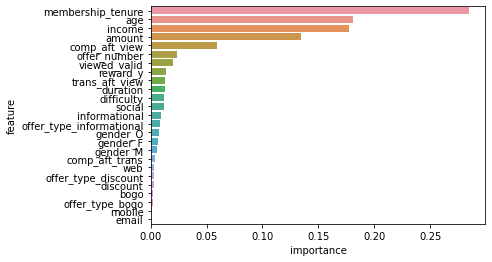

In [180]:
# Check the importance of the features
pd.set_option('display.max_colwidth', 60)
feat = list(zip(X.columns,rf.feature_importances_))
important_features = pd.DataFrame(list(feat), columns =['feature','importance']).sort_values('importance', ascending=False)
ax = sns.barplot(x='importance', y='feature', data=important_features)
print(important_features.sort_values(by=['importance'],ascending= False))

We demonstrated that a machine learning model can be created to predict if an offer will be effective.  Looking at the chart and table above, Membership Tenure, Age, Income, and amount spent are the most important features.  Reward had some importance as well as duration, difficulty.  Social media seemed to have more imporance than use of Web, Mobile, or Email.

Now, we will see if there are differences in factor importance by offer type.  Since we will repeat code, the following functions were created, avoiding unnecessary duplication.

In [181]:
def assign_X_and_y(df):
    '''
    This function assigns the variables to X and y, runs the model
    
    Inputs:
    df = The dataframe to be used with the machine learning model
    '''
    # create the explanatory and response variables
    X = df
    X = X.drop(['effective_offer'], axis=1)
    y = df['effective_offer']



    # split the data into train and test data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
    return(X_train, X_test, y_train, y_test)

In [182]:
def transpose_X_and_y(X_train, X_test):    
    scaler=StandardScaler()
    X_train=scaler.fit_transform(X_train)

    #scale test data
    X_test=scaler.transform(X_test)
    
    return(X_train, X_test)

In [183]:
def define_classifier():    
    # prepare the classifers to be used in KFold
    clfs = [DecisionTreeClassifier(random_state=0), RandomForestClassifier(n_jobs=-1)]

    nfolds = 10
    kf = KFold(n_splits=nfolds,random_state=0,shuffle=True)
    return(clfs, kf, nfolds)

In [184]:
def fit_the_model(X_train, y_train, X_test):    
    rf = RandomForestClassifier(criterion= 'gini',
                             max_depth= None,
                             min_samples_leaf= 1,
                             min_samples_split= 2,
                             random_state = 24)

    print(rf.fit(X_train, y_train))
    y_pred = rf.predict(X_test)

    print("Train Accuracy is: ", accuracy_score(y_train, rf.predict(X_train)))
    print("Test Accuracy is: ", accuracy_score(y_test, y_pred))

In [185]:
def display_feature_importance(chart_title):
    # Check the importance of the features
    pd.set_option('display.max_colwidth', 60)
    feat = list(zip(X.columns,rf.feature_importances_))
    important_features = pd.DataFrame(list(feat), columns =['feature','importance']).sort_values('importance', ascending=False)
    ax = sns.barplot(x='importance', y='feature', data=important_features)
    ax.set_xlabel('Importance')
    ax.set_ylabel('Feature');
    ax.set_title(chart_title)
    print(important_features.sort_values(by=['importance'],ascending= False))

In [186]:
# this code runs the functions previously defined
def main(df, chart_title):
    assign_X_and_y(df)
    transpose_X_and_y(X_train, X_test)
    define_classifier()
    fit_the_model(X_train, y_train, X_test)
    display_feature_importance(chart_title)

RandomForestClassifier(random_state=24)
Train Accuracy is:  0.9977857250629009
Test Accuracy is:  0.9031595087021058
                     feature  importance
8          membership_tenure    0.285007
6                        age    0.181288
7                     income    0.177537
0                     amount    0.134742
4              comp_aft_view    0.059034
1               offer_number    0.023865
2               viewed_valid    0.019620
11                  reward_y    0.013727
3             trans_aft_view    0.012722
10                  duration    0.012477
9                 difficulty    0.012115
14                    social    0.012058
18             informational    0.009488
24  offer_type_informational    0.008078
21                  gender_O    0.007246
19                  gender_F    0.006999
20                  gender_M    0.005527
5             comp_aft_trans    0.003586
15                       web    0.003291
23       offer_type_discount    0.002779
17                  di

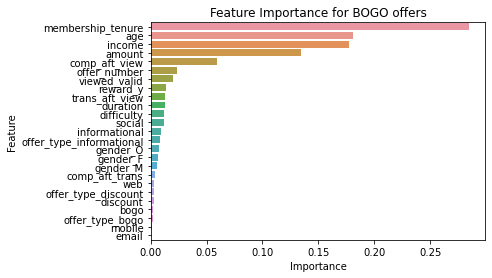

In [187]:
# run model for BOGO offers
bogo_ml = ml_test2[ml_test2['bogo']==1]
main(bogo_ml, 'Feature Importance for BOGO offers')

RandomForestClassifier(random_state=24)
Train Accuracy is:  0.9977857250629009
Test Accuracy is:  0.9031595087021058
                     feature  importance
8          membership_tenure    0.285007
6                        age    0.181288
7                     income    0.177537
0                     amount    0.134742
4              comp_aft_view    0.059034
1               offer_number    0.023865
2               viewed_valid    0.019620
11                  reward_y    0.013727
3             trans_aft_view    0.012722
10                  duration    0.012477
9                 difficulty    0.012115
14                    social    0.012058
18             informational    0.009488
24  offer_type_informational    0.008078
21                  gender_O    0.007246
19                  gender_F    0.006999
20                  gender_M    0.005527
5             comp_aft_trans    0.003586
15                       web    0.003291
23       offer_type_discount    0.002779
17                  di

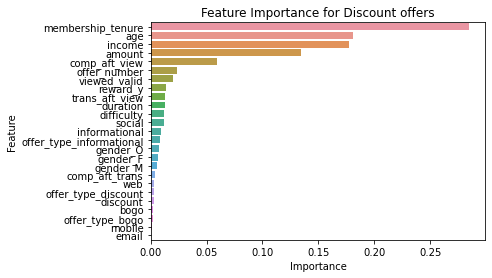

In [188]:
# run model for Discount offers
discount_ml = ml_test2[ml_test2['discount']==1]
main(discount_ml, 'Feature Importance for Discount offers')

RandomForestClassifier(random_state=24)
Train Accuracy is:  0.9977857250629009
Test Accuracy is:  0.9031595087021058
                     feature  importance
8          membership_tenure    0.285007
6                        age    0.181288
7                     income    0.177537
0                     amount    0.134742
4              comp_aft_view    0.059034
1               offer_number    0.023865
2               viewed_valid    0.019620
11                  reward_y    0.013727
3             trans_aft_view    0.012722
10                  duration    0.012477
9                 difficulty    0.012115
14                    social    0.012058
18             informational    0.009488
24  offer_type_informational    0.008078
21                  gender_O    0.007246
19                  gender_F    0.006999
20                  gender_M    0.005527
5             comp_aft_trans    0.003586
15                       web    0.003291
23       offer_type_discount    0.002779
17                  di

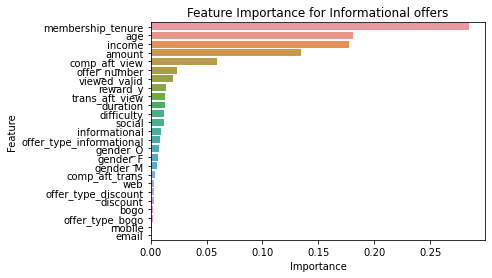

In [189]:
# run model for Informational offers
informational_ml = ml_test2[ml_test2['informational']==1]
main(bogo_ml, 'Feature Importance for Informational offers')

Looking at each of the charts above, we see that Membership Tenure, Age, Income and Amount spent are the most important features in each of the offer types.

### Conclusion



The following aspects were found interesting in the data:<br>
•	Looking at user profile data, the median income is $64,000.<br>
•	The largest reported income in the group was 120,000 and it was reported by user 17,000.<br>
•	Females seem to report a slightly higher mean income than males.  <br>
•	While the effective offer group has slightly more male users, the female users are spending more.  <br>
•	Customers in the 1-3 year tenure group tended to purchase more, followed by the 3-5 year group.<br>
•	There appear to be slight differences in median income. Users in the 1-3 year range have 62,000 dollars in median annual income, while users in the 3-5 year range have 59,000 dollars in median annual income.<br>
•	Offers 6, 7 and 9 had the largest number of media types, reaching the largest number of users. Offers 3, 4, 5, 8 and 10 had fewer media types than the other offers.  <br>
•	Offer number 7 had the largest number of transactions, followed by 9 and 1.  <br>
•	There appear to be a slightly larger group of males reached by the effective offers.<br>
•	Offers 1 and 2 are slightly more effective for female when compared to simulated male users.<br>
•	Offers 4, 6, 7, 9 and 10 had at least a 6 percent difference in effectiveness compared to the simulated female users.<br>
•	While female users spend more than males, the males have a larger number of transactions.<br>
•	For females, discount and gender are almost equally preferred, while males clearly prefer discount. Users with undefined gender clearly preferred discount to BOGO.<br>
•	In all cases, informational promos were least preferred.<br>
•	The data seems to confirm that users assigned to group 1 (effective offers) spend more than those in group 3 (customers who purchase regardless of offer). While this would seem to indicate it makes sense to provide these promotions, financial analysis would need to be conducted to ensure there is a cost benefit.


### Recommendations

The users assigned to Group 4 should not continue to receive offers.  They do not view the offers.  It would be a waste of resources and can possibly annoy these users.  The users in Group 2 received the offers but, were not compelled to complete them.  Starbucks should continue to analyze these users in the hope they may respond to future offers.  Customers in group 3 are Starbuck's loyal users, purchasing regardless of promotions.  Starbucks may want to craft other offers for this segment, like customer appreciation offers, driving additional purchases and ensuring customer loyalty.  

Tables were provided in the analysis above to allow the Product Team to determine which offers were successful within segments.

### Justification

Does the solution outlined in this project meet the business needs outlined in the problem statement? Yes, We successfully imported, cleaned and prepared the dataframes for analysis. Groups were defined in order to determine effective offers, ineffective offers, loyal users and users not affected by offers. Using transaction data, customers were successfully assigned to each of the groups ensuring promotions were completed properly. We answered a number of questions regarding the users and offers , making recommendations for Group 1 and 4.  We were successful in creating a machine learning model to identify which offers are effective for users. Using a combination of user, transaction, offer and engineered feature data, we were able to achieve over 90 percent test accuracy.  We demonstrated that a machine learning model can be created to predict if an offer will be effective.  Membership Tenure, Age, Income, and amount spent are the most important features.  

### Ideas for improvement

The following ideas should be considered for future studies:
1.	Conduct A/B testing to determine which media are most effective. <br>
2.	Continue to study the users in group 2. These users view the offers, but, have not taken advantage of the offers.<br>
3.	Create an ETL Pipeline to clean and process the data, saving it as a Pickle file.<br>
4.	Create an ML Pipeline to process updates to the data and update the Machine Learning model<br>
5.	Create an SQL interface to allow Product and Marketing to look at user and segment data for each offer.<br>
6.  The model may be further improved by combining models to improve testing accuracy.  Other models could also be considered, such as XGBoost and LightGBM


### Save trans_profile to .CSV

In [192]:
# output transaction_master to .csv
trans_profile.to_csv('trans_profile.csv', index = False, encoding = 'utf-8')

In [197]:
tenure.head()

,level_0,index,event,time,amount,reward,transaction,user_id,offer_number,offer_id_previous,event_subsequent,viewed_valid,trans_aft_view,comp_aft_view,comp_aft_trans,received,viewed,trans,completed,group,max_duration,group1,grp_time,grp_new,income_range,age_range,member_tenure_group,income
0,0,110828,offer received,336,0.0,0.0,0,1,5,5.0,offer viewed,1,0,0,0,1,0,0,0,2.0,240,2.0,0,2.0,income_not_provided,age_not_provided,1_to_3_years,-1.0
1,1,130147,offer viewed,348,0.0,0.0,0,1,5,NaN,NaN,0,0,0,0,0,1,0,0,2.0,240,2.0,0,2.0,income_not_provided,age_not_provided,1_to_3_years,-1.0
2,2,201570,offer received,504,0.0,0.0,0,1,6,6.0,offer viewed,1,0,0,0,1,0,0,0,1.0,168,1.0,0,1.0,income_not_provided,age_not_provided,1_to_3_years,-1.0
3,3,214274,offer viewed,504,0.0,0.0,0,1,6,6.0,offer completed,0,0,1,0,0,1,0,0,1.0,168,1.0,0,1.0,income_not_provided,age_not_provided,1_to_3_years,-1.0
4,4,237366,offer completed,552,0.0,3.0,0,1,6,NaN,NaN,0,0,0,0,0,0,0,1,1.0,168,1.0,0,1.0,income_not_provided,age_not_provided,1_to_3_years,-1.0
